# Time Series Analysis and Forecasting

This is a series of notebooks to support lectures on _Time series analysis and forecast_.

![](https://user-images.githubusercontent.com/49638680/154160268-cf39a1ec-3557-4940-8853-d06fc7a79acf.png)

## Time series Analysis

We start by the definition of time series again. 
In paticular, over this notebook we are going to explore various analysis methods for time series, and also we are going to see some visualisation tools and graphical analysis.

### The order of data

How is time involved in classic supervised learning? Once trained, a model is tested on future data. Generally, however, at training time all records are treated the same way; that is, they are not temporally sorted.

Time series provide data with a temporal relationship.

We call **analysis** the process of understanding and describing a time series of data recorded in the past; such analysis is not necessarily focused on predicting the future. When we explicitly use a time series to predict its future, we are **forecasting**.

Let's continue with quantitative and graphical analysis. In the next classes, we will build on these tools to make predictions.

#### Univariate vs multivariate

We define **univariate** a time series consist of a single variable observed over time, such as the numbers of sales of a given product or the minimum daily temperature. The [OPSD database](https://open-power-system-data.org/) we have loaded at the beginning of this class is another example of univariate time series.

![](https://raw.githubusercontent.com/fbagattini/Lezioni/5fb4bc1b5a97d345da6fff9e66e19921bbc45176/img/uni.png)

In a **multivariate** time series, multiple quantities vary over time. For example, think of a physical system where the speed along the three axes $x(t)$, $y(t)$, $z(t)$,  and  is recorded at every time step. The OPSD_Germany_all dataset of the previous exercise is a multivariate time series.
 
![](https://github.com/fbagattini/Lezioni/raw/5fb4bc1b5a97d345da6fff9e66e19921bbc45176/img/multi.png)

#### Frequencies

The time step rate on which we measure and store data in a time series is called _frequency_. We have seen data stored as daily observation, as you may imagine these data have a _daily_ frequency. 
You can esaily imagine time series having _yearly_, _monthly_ or even _second_ frequency. 

What about time series that do not have a fixed rate for time scans? They are called **uneven**.

To summarise: A time series can have either a fixed (daily, weekly, ...) or variable frequency. They are respectively referred to as **even** and **uneven** time series.

We will see how Pandas handles the frequency of a time series. Let's start with `date_range`, which allows to create a temporal index with a given frequency.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set()

In [2]:
data_url = 'https://raw.githubusercontent.com/fbagattini/Lezioni/master/data/OPSD_Germany_consumption.csv'

##### Import data and indexing them at loading time
Recall that we can make all the operations in one line of code. We will use some selected arguments of `read_csv`:

* `parse_dates` 
* `index_col`

The former one accepts a boolean as value (hence`True` or `False`) setting whether to try parsing dates as `Datetime` objects, on the other hand the latter accepts a string or a list of strings indicating which columns should be used as index.

In [3]:
df = pd.read_csv(data_url,
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


#### The `date_range` method

Let's explore this pandas method to create temporal index with a related property: _frequency_.

In particular, we want to get all the days from the 9th of March 2020 to the 07th of June 2021.

In [4]:
start_date = pd.to_datetime('9th of March 2020') # What if I wrote just '2020-03-09'?
end_date = pd.to_datetime('7th of June 2021')
pd.date_range(start_date, end_date, freq='D') # What if I want only business days?

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18',
               ...
               '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01',
               '2021-06-02', '2021-06-03', '2021-06-04', '2021-06-05',
               '2021-06-06', '2021-06-07'],
              dtype='datetime64[ns]', length=456, freq='D')

Weekly frequency

In [5]:
pd.date_range(start_date, end_date, freq='W')

DatetimeIndex(['2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03',
               '2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12', '2020-07-19', '2020-07-26',
               '2020-08-02', '2020-08-09', '2020-08-16', '2020-08-23',
               '2020-08-30', '2020-09-06', '2020-09-13', '2020-09-20',
               '2020-09-27', '2020-10-04', '2020-10-11', '2020-10-18',
               '2020-10-25', '2020-11-01', '2020-11-08', '2020-11-15',
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07',
               '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04',
      

Weeks can start by Sundays or by Mondays.

In [6]:
pd.date_range(start_date, end_date, freq='W-MON')

DatetimeIndex(['2020-03-09', '2020-03-16', '2020-03-23', '2020-03-30',
               '2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27',
               '2020-05-04', '2020-05-11', '2020-05-18', '2020-05-25',
               '2020-06-01', '2020-06-08', '2020-06-15', '2020-06-22',
               '2020-06-29', '2020-07-06', '2020-07-13', '2020-07-20',
               '2020-07-27', '2020-08-03', '2020-08-10', '2020-08-17',
               '2020-08-24', '2020-08-31', '2020-09-07', '2020-09-14',
               '2020-09-21', '2020-09-28', '2020-10-05', '2020-10-12',
               '2020-10-19', '2020-10-26', '2020-11-02', '2020-11-09',
               '2020-11-16', '2020-11-23', '2020-11-30', '2020-12-07',
               '2020-12-14', '2020-12-21', '2020-12-28', '2021-01-04',
               '2021-01-11', '2021-01-18', '2021-01-25', '2021-02-01',
               '2021-02-08', '2021-02-15', '2021-02-22', '2021-03-01',
               '2021-03-08', '2021-03-15', '2021-03-22', '2021-03-29',
      

Hourly frequency

In [7]:
pd.date_range(start_date, end_date, freq='1H')

DatetimeIndex(['2020-03-09 00:00:00', '2020-03-09 01:00:00',
               '2020-03-09 02:00:00', '2020-03-09 03:00:00',
               '2020-03-09 04:00:00', '2020-03-09 05:00:00',
               '2020-03-09 06:00:00', '2020-03-09 07:00:00',
               '2020-03-09 08:00:00', '2020-03-09 09:00:00',
               ...
               '2021-06-06 15:00:00', '2021-06-06 16:00:00',
               '2021-06-06 17:00:00', '2021-06-06 18:00:00',
               '2021-06-06 19:00:00', '2021-06-06 20:00:00',
               '2021-06-06 21:00:00', '2021-06-06 22:00:00',
               '2021-06-06 23:00:00', '2021-06-07 00:00:00'],
              dtype='datetime64[ns]', length=10921, freq='H')

> What if I want a determined number of steps with a certain frequency?

_.e.g._ 36 weeks after a certain date.

In [8]:
pd.date_range(start=start_date, freq='W-MON', periods = 36)

DatetimeIndex(['2020-03-09', '2020-03-16', '2020-03-23', '2020-03-30',
               '2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27',
               '2020-05-04', '2020-05-11', '2020-05-18', '2020-05-25',
               '2020-06-01', '2020-06-08', '2020-06-15', '2020-06-22',
               '2020-06-29', '2020-07-06', '2020-07-13', '2020-07-20',
               '2020-07-27', '2020-08-03', '2020-08-10', '2020-08-17',
               '2020-08-24', '2020-08-31', '2020-09-07', '2020-09-14',
               '2020-09-21', '2020-09-28', '2020-10-05', '2020-10-12',
               '2020-10-19', '2020-10-26', '2020-11-02', '2020-11-09'],
              dtype='datetime64[ns]', freq='W-MON')

Or even a more complex option: $120$ $30$ seconds time steps

In [9]:
pd.date_range(start=start_date, freq='30s', periods = 120)

DatetimeIndex(['2020-03-09 00:00:00', '2020-03-09 00:00:30',
               '2020-03-09 00:01:00', '2020-03-09 00:01:30',
               '2020-03-09 00:02:00', '2020-03-09 00:02:30',
               '2020-03-09 00:03:00', '2020-03-09 00:03:30',
               '2020-03-09 00:04:00', '2020-03-09 00:04:30',
               ...
               '2020-03-09 00:55:00', '2020-03-09 00:55:30',
               '2020-03-09 00:56:00', '2020-03-09 00:56:30',
               '2020-03-09 00:57:00', '2020-03-09 00:57:30',
               '2020-03-09 00:58:00', '2020-03-09 00:58:30',
               '2020-03-09 00:59:00', '2020-03-09 00:59:30'],
              dtype='datetime64[ns]', length=120, freq='30S')

### Changing Data frequency

Let's go back to our consumption data.

In [10]:
df

,Consumption
Date,
2006-01-01,1069.18400
2006-01-02,1380.52100
2006-01-03,1442.53300
2006-01-04,1457.21700
2006-01-05,1477.13100
...,...
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753


In [11]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

When Pandas loads a .csv, the frequency information is usually ignored, and has to be explicitly set through the `asfreq` function.

In [12]:
df.asfreq('D').index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

Here we knew that the "right" frequency was the daily one, but what if we have holes in our dataframe? _e.g._ some days we do not have available data.

In other words, what if we assign a frequency to a time index with 'holes' in it?

In [13]:
some_days =  pd.to_datetime(['2012-01-01', '2012-01-05', '2012-01-07'])
some_days

DatetimeIndex(['2012-01-01', '2012-01-05', '2012-01-07'], dtype='datetime64[ns]', freq=None)

We can see this as a _mask_ for our dataframe index.

In [14]:
df.loc[some_days]

,Consumption
2012-01-01,948.128
2012-01-05,1376.658
2012-01-07,1175.688


In [15]:
df.loc[some_days].asfreq('D')

,Consumption
2012-01-01,948.128
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,1376.658
2012-01-06,NaN
2012-01-07,1175.688


NaN values can be nasty. Luckily, the arguments of `asfreq` allow to choose how to fill the holes.

In [16]:
df.loc[some_days].asfreq('D', method='ffill')

,Consumption
2012-01-01,948.128
2012-01-02,948.128
2012-01-03,948.128
2012-01-04,948.128
2012-01-05,1376.658
2012-01-06,1376.658
2012-01-07,1175.688


`"ffill"` stands for _forward fill_, meaning use the previous value to fill holes until you find a non-empty one.

We can also choose which value use to fill.

In [17]:
df.loc[some_days].asfreq('D', fill_value=0)

,Consumption
2012-01-01,948.128
2012-01-02,0.000
2012-01-03,0.000
2012-01-04,0.000
2012-01-05,1376.658
2012-01-06,0.000
2012-01-07,1175.688


In [18]:
df.loc[some_days].asfreq('D', method = 'bfill')

,Consumption
2012-01-01,948.128
2012-01-02,1376.658
2012-01-03,1376.658
2012-01-04,1376.658
2012-01-05,1376.658
2012-01-06,1175.688
2012-01-07,1175.688


As you might imagine, `’backfill’` / `‘bfill’`: use NEXT valid observation to fill.

**Recap**: we have seen the difference between analysis and forecast, and defined time series with specific traits. Moreover, we have learnt how to handle the frequency of time indexed Pandas dataframe.

---
## Graphical analysis

Let's start our hands-on time series analysis using Python data visualization tools.

### Matplotlib and Seaborn

[Matplotlib](https://matplotlib.org/) is a highly customisable library, maybe too much customisable, hence a bit tricky at first. [Seaborn](https://seaborn.pydata.org/) standardises some graphical aspects and easily integrates with Pandas.

Recall we imported seaborn as sns and we called `sns.set()`.
Indeed, once that Seaborn has been imported, we can use the set function to force its default graphical settings.

```python
import seaborn as sns
sns.set()
```

Tricky question for you:
> Why we import Seaborn as `sns`?

<details>
    <summary><b>HINT</b></summary> 
    <p align="center">
      <a href= "https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns"><img src="https://www.thesun.co.uk/wp-content/uploads/2019/06/NINTCHDBPICT000002475114.jpg" width="350" title="Sam Norman Seaborn"></a>
    </p>
    Click on the image for a little bit more detailed answer.
</details>

In [19]:
url_data = "https://raw.githubusercontent.com/fbagattini/Lezioni/master/data/OPSD_Germany_all.csv"
df = pd.read_csv(url_data,
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


The `plot` method inherits from matplotlib and prints a plot of the content of a dataframe or a Series (an individual column of a dataframe).

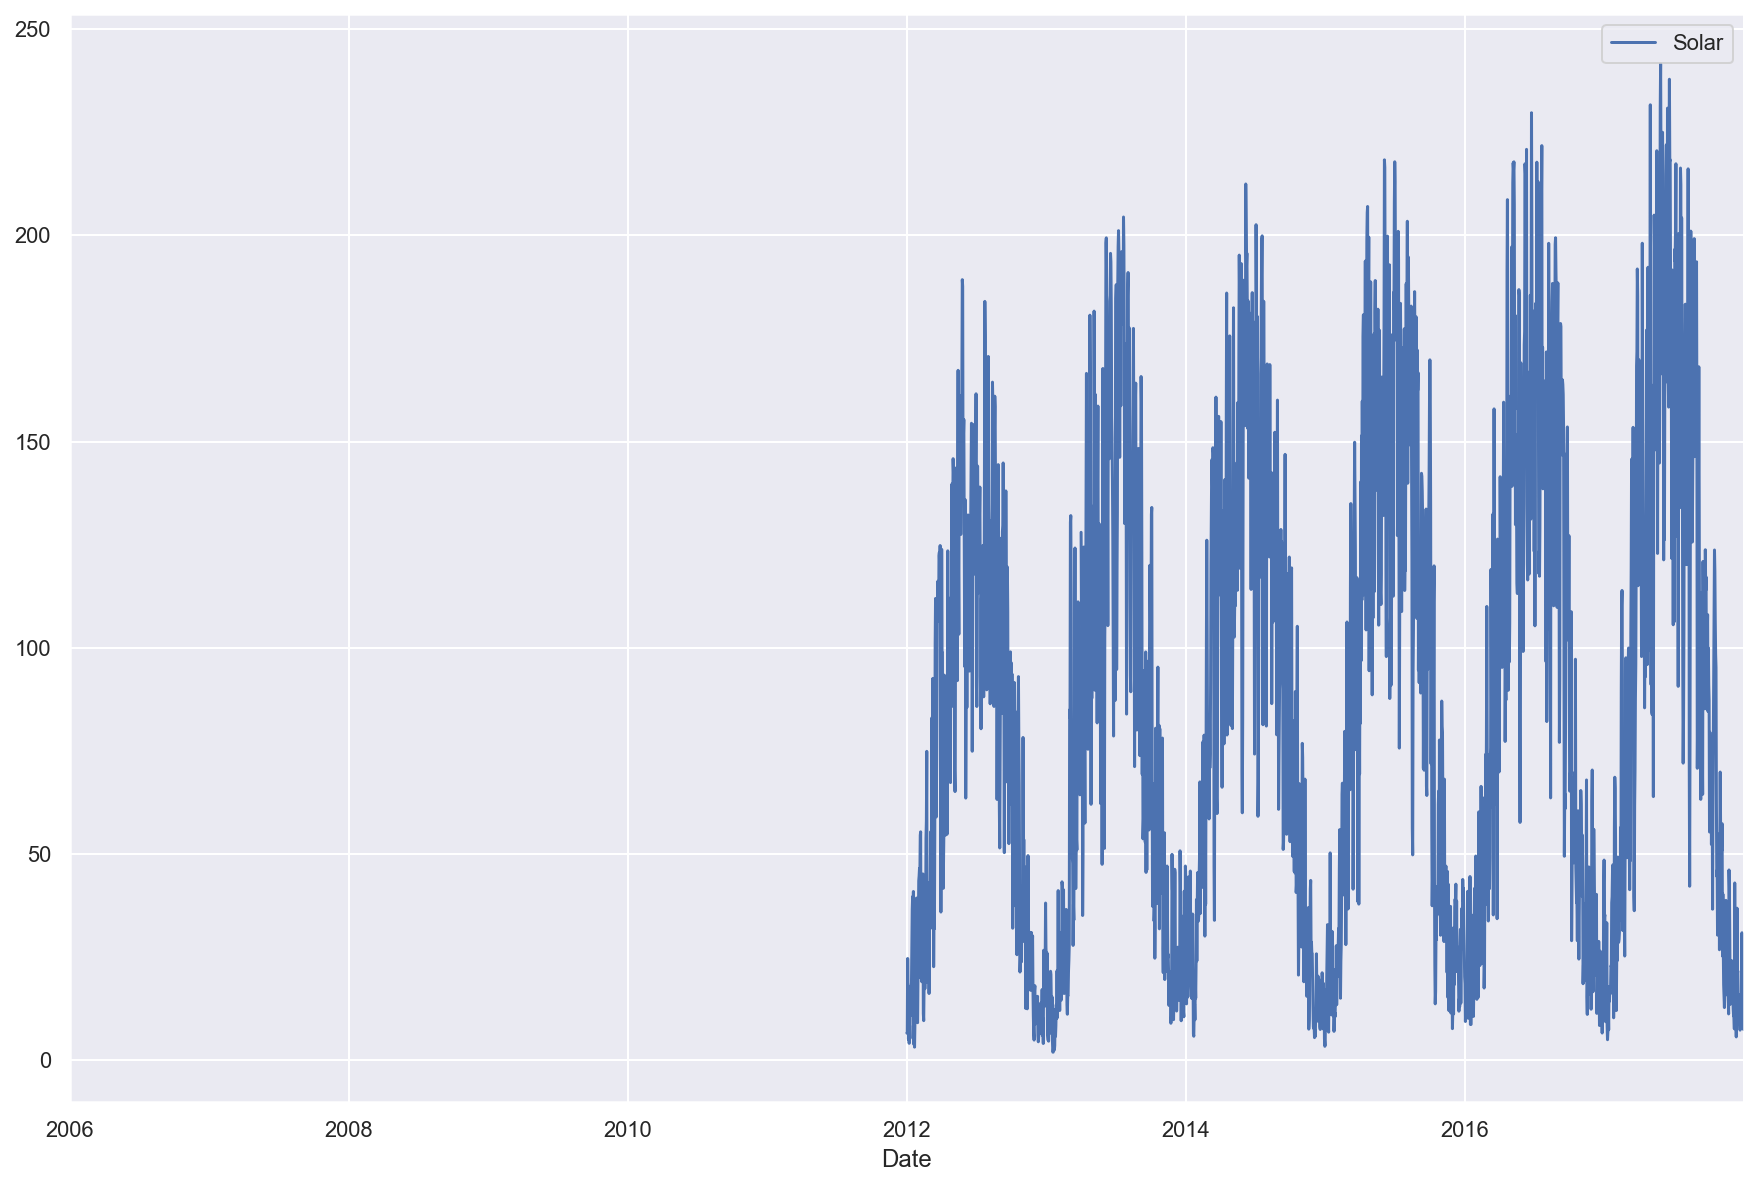

In [20]:
df_solar = df[['Solar']] # What is the difference between df[column] and df[[column]]?

df_solar.plot();

### Plot examples
Pandas' `plot` function has many optional arguments.

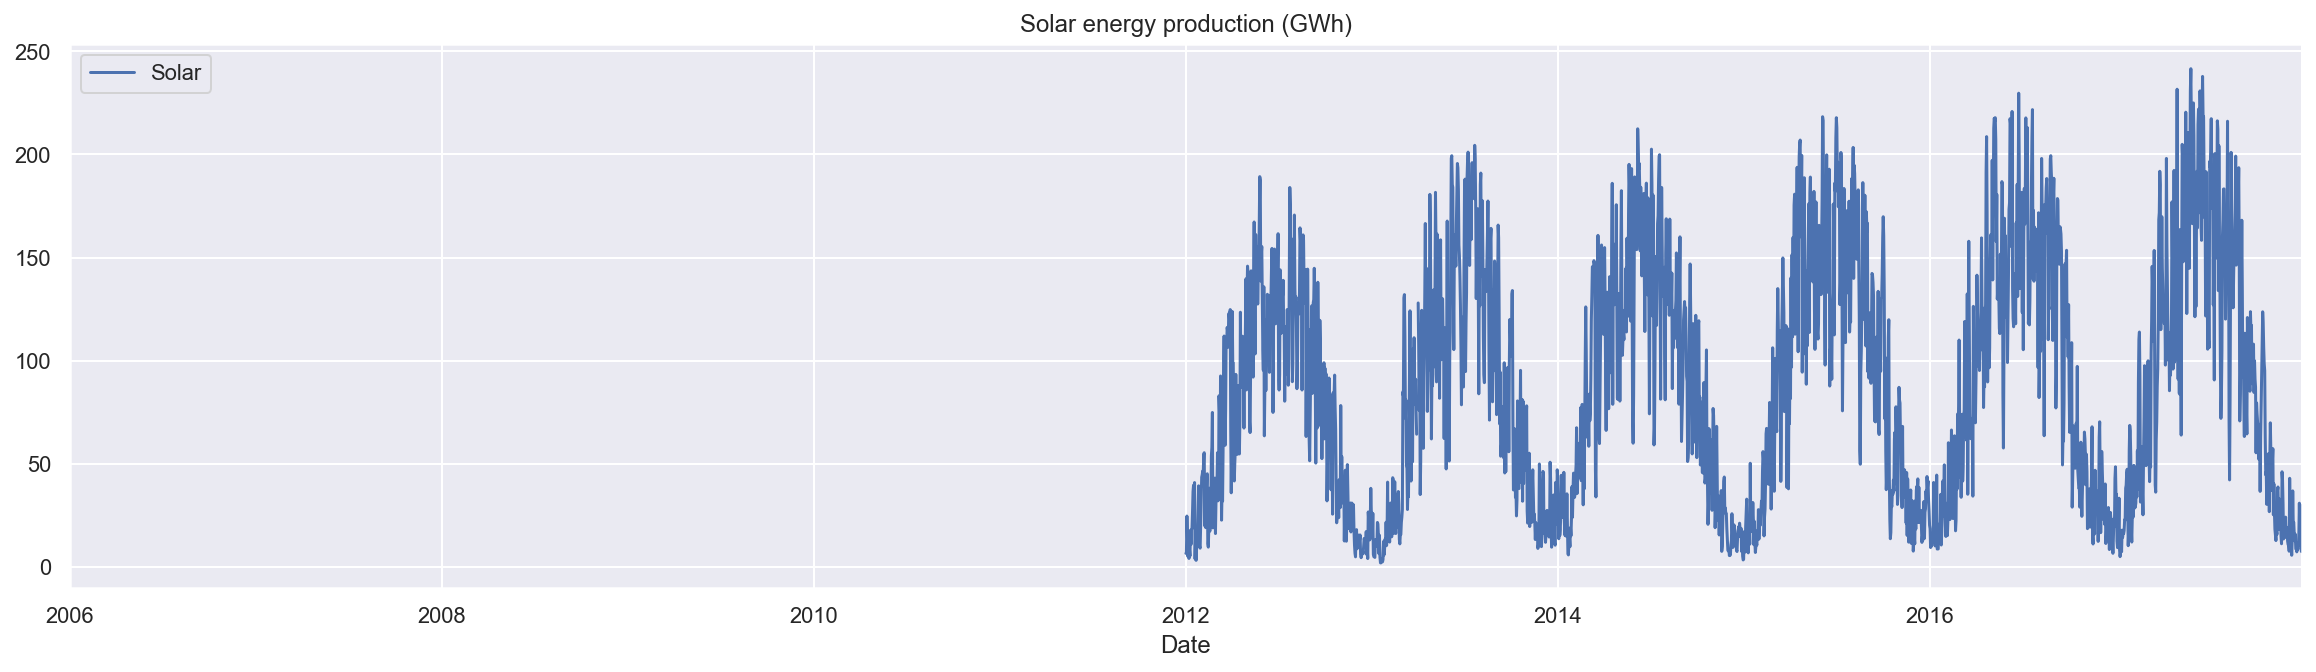

In [21]:
df_solar.plot(figsize=(20, 5), title='Solar energy production (GWh)');

Some of these arguments are linked to Matplotlib properties and not directly available within the function documentation (😠). A complete list of such properties can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html).

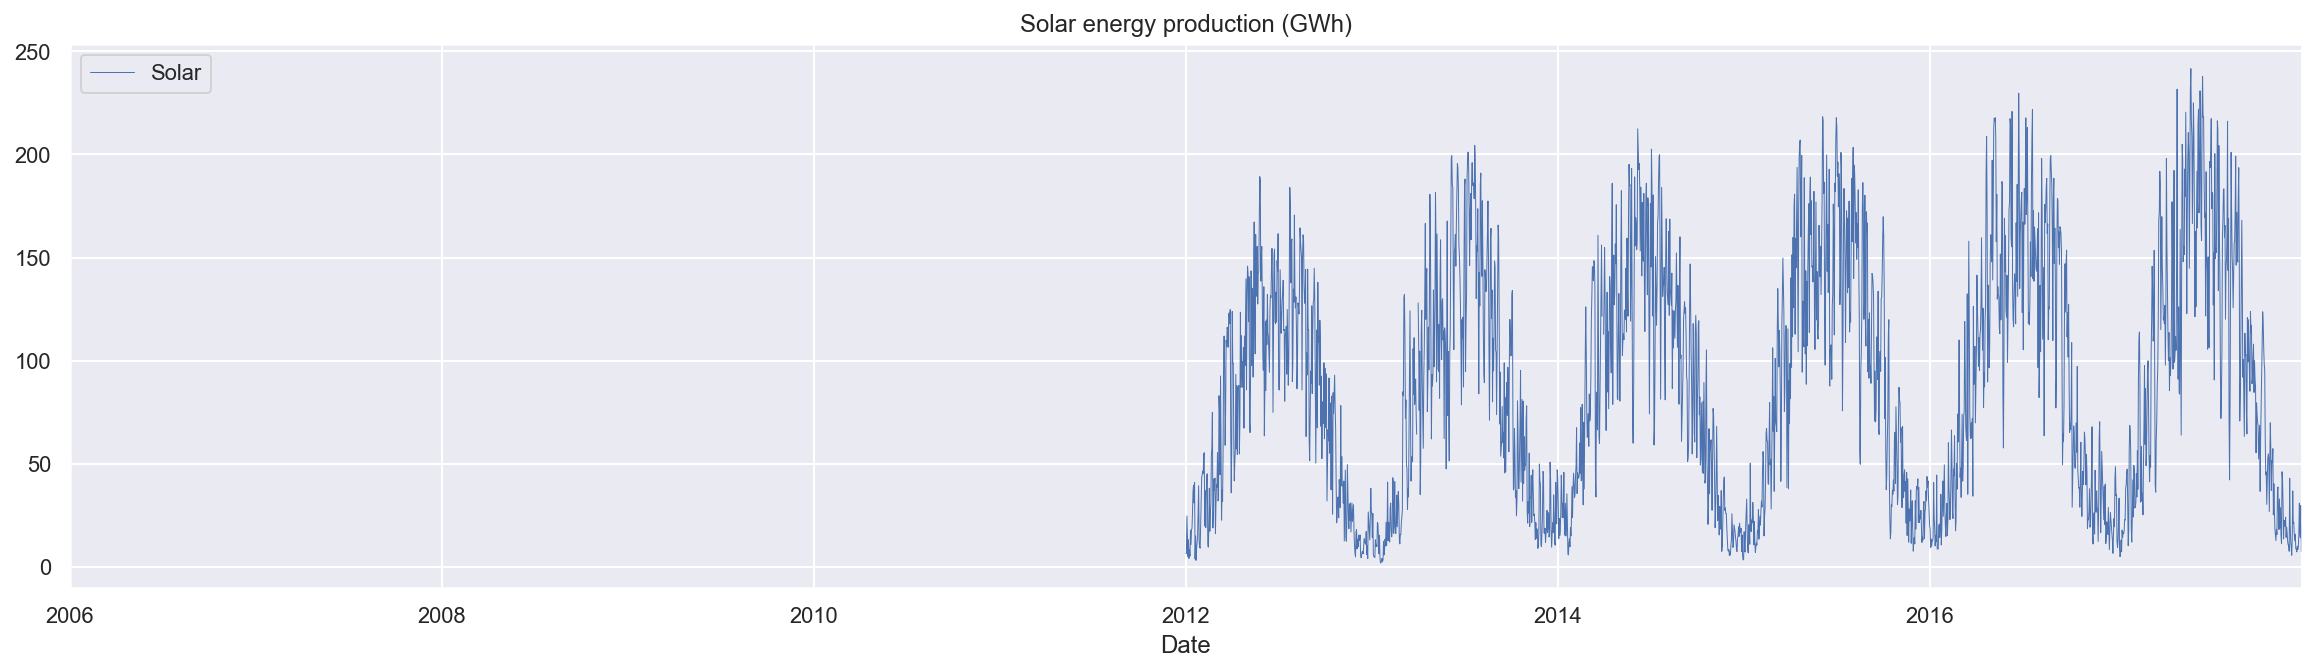

In [22]:
df_solar.plot(figsize=(20, 5), title='Solar energy production (GWh)', linewidth=.5);

Note the optional argument, especially the `marker` and `linestyle` ones.

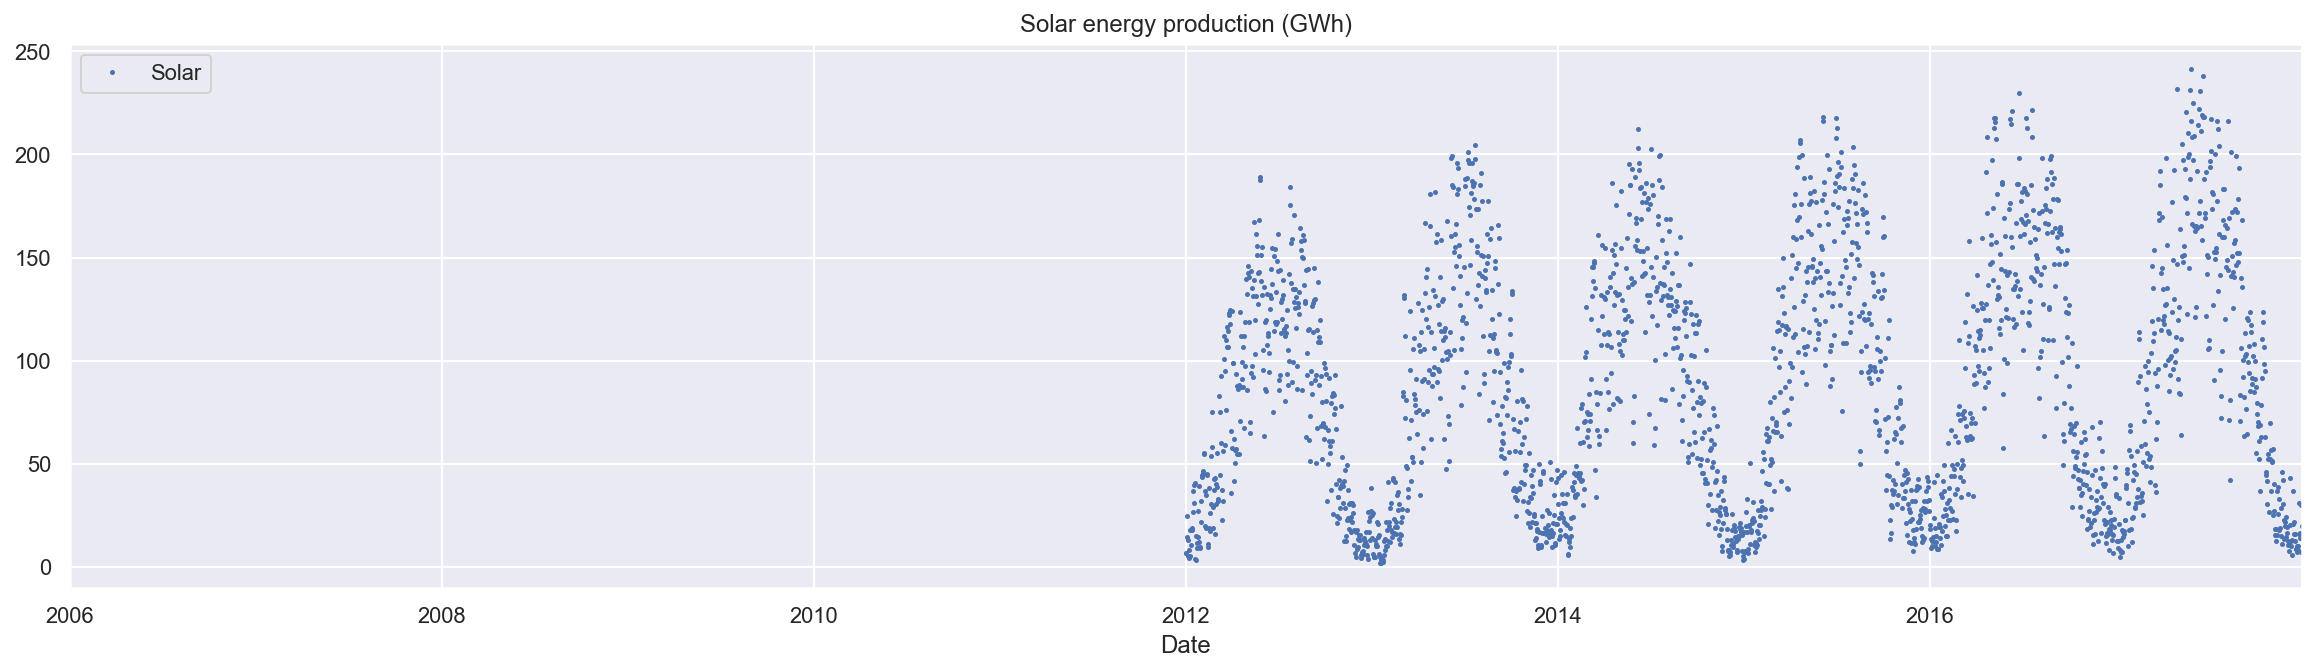

In [23]:
df_solar.plot(figsize=(20, 5),
              title='Solar energy production (GWh)',
              marker='.',
              markersize=3,
              linestyle='');

Since `plot` is a series or dataframe objects method, we can apply filters, queries, etc. and all functions returning a series or a dataframe before and then plot the filtered quantities.

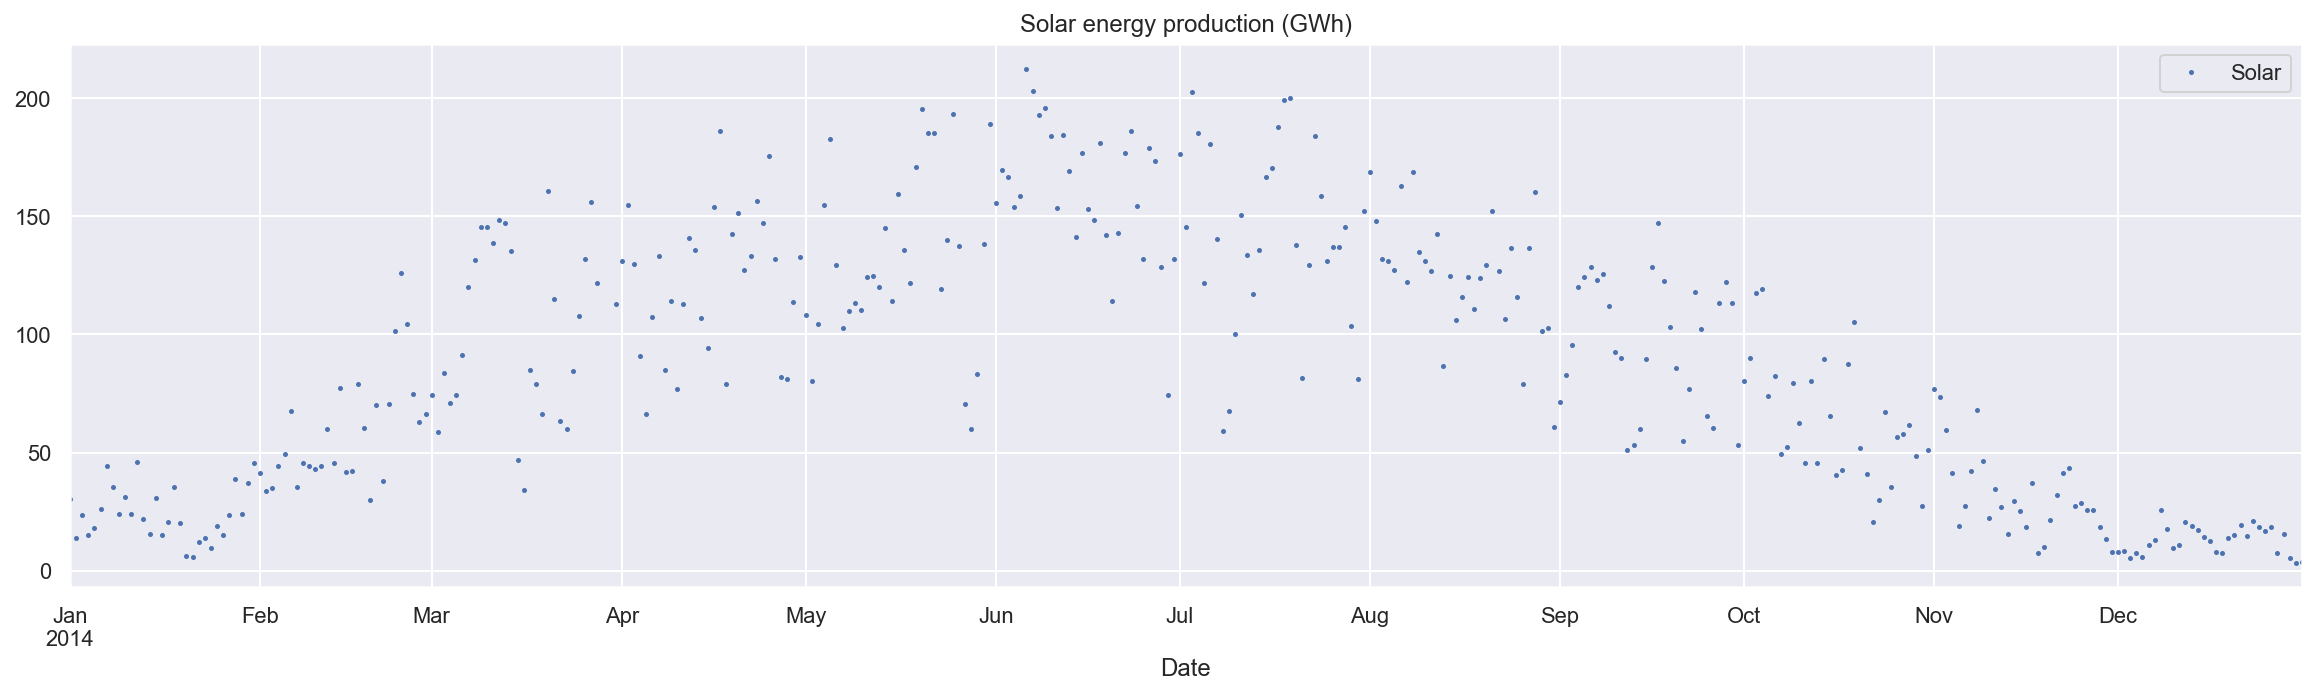

In [26]:
df_solar.loc['2014'].plot(figsize=(20, 5),
                      title='Solar energy production (GWh)',
                      marker='.',
                      markersize=3,
                      linestyle='');

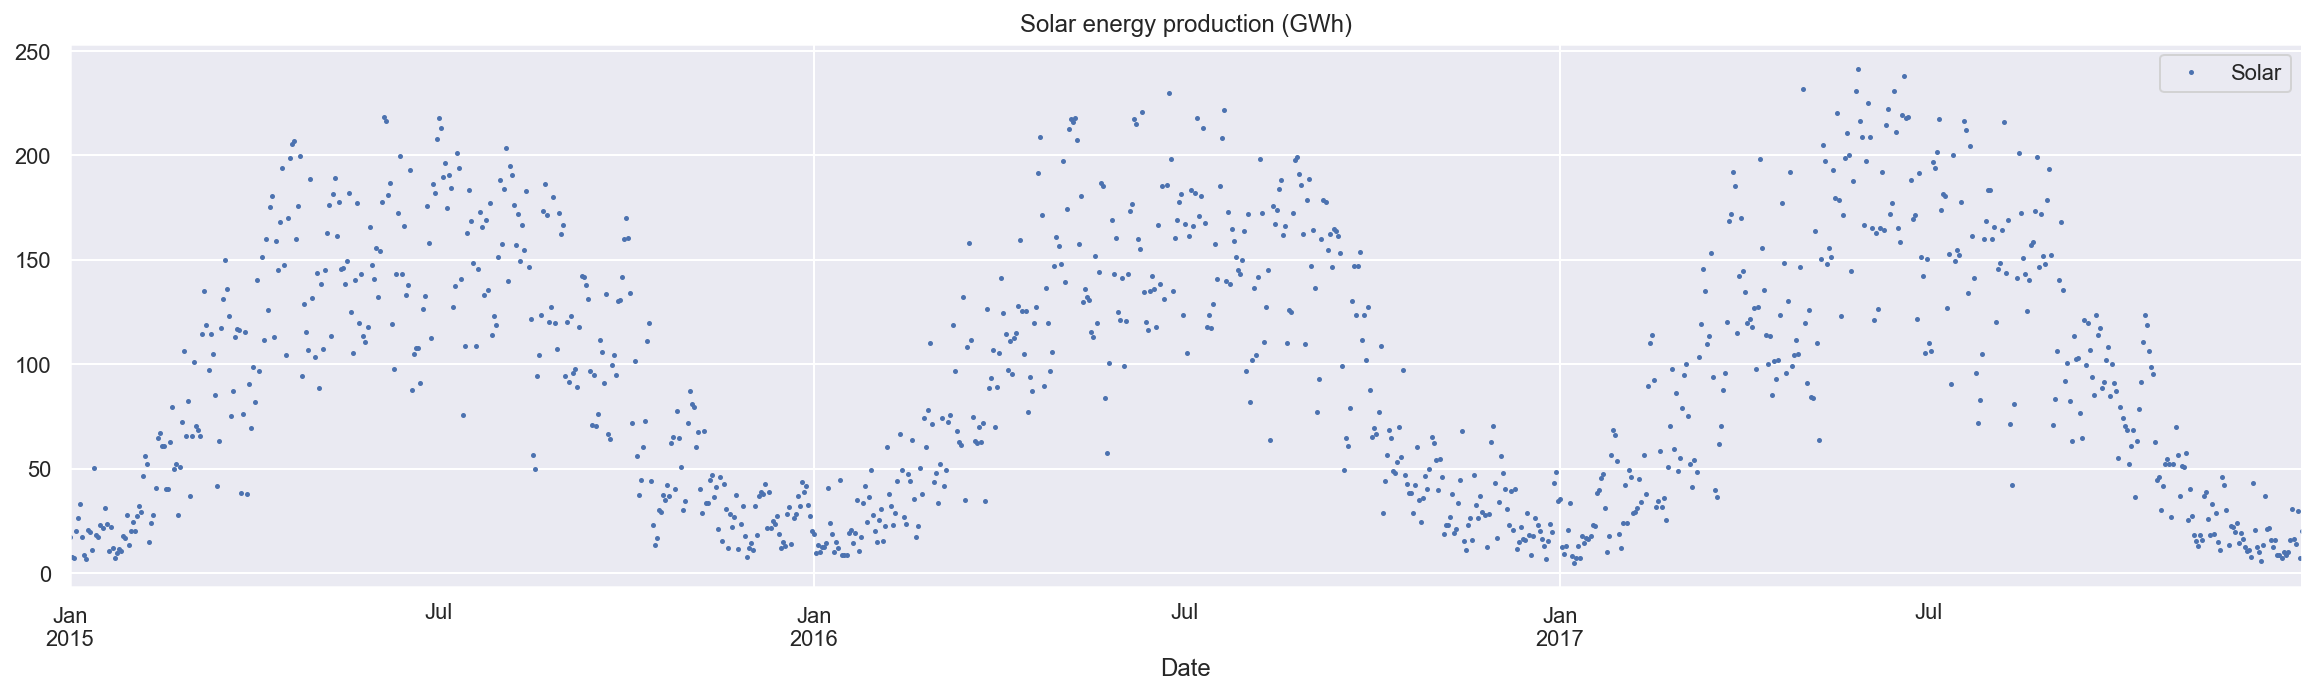

In [25]:
df_solar.query('Date >= 2015').plot(figsize=(20, 5),
                                    title='Solar energy production (GWh)',
                                    marker='.',
                                    markersize=3,
                                    linestyle='');

Note how plots are indexed based on the granularity of data.

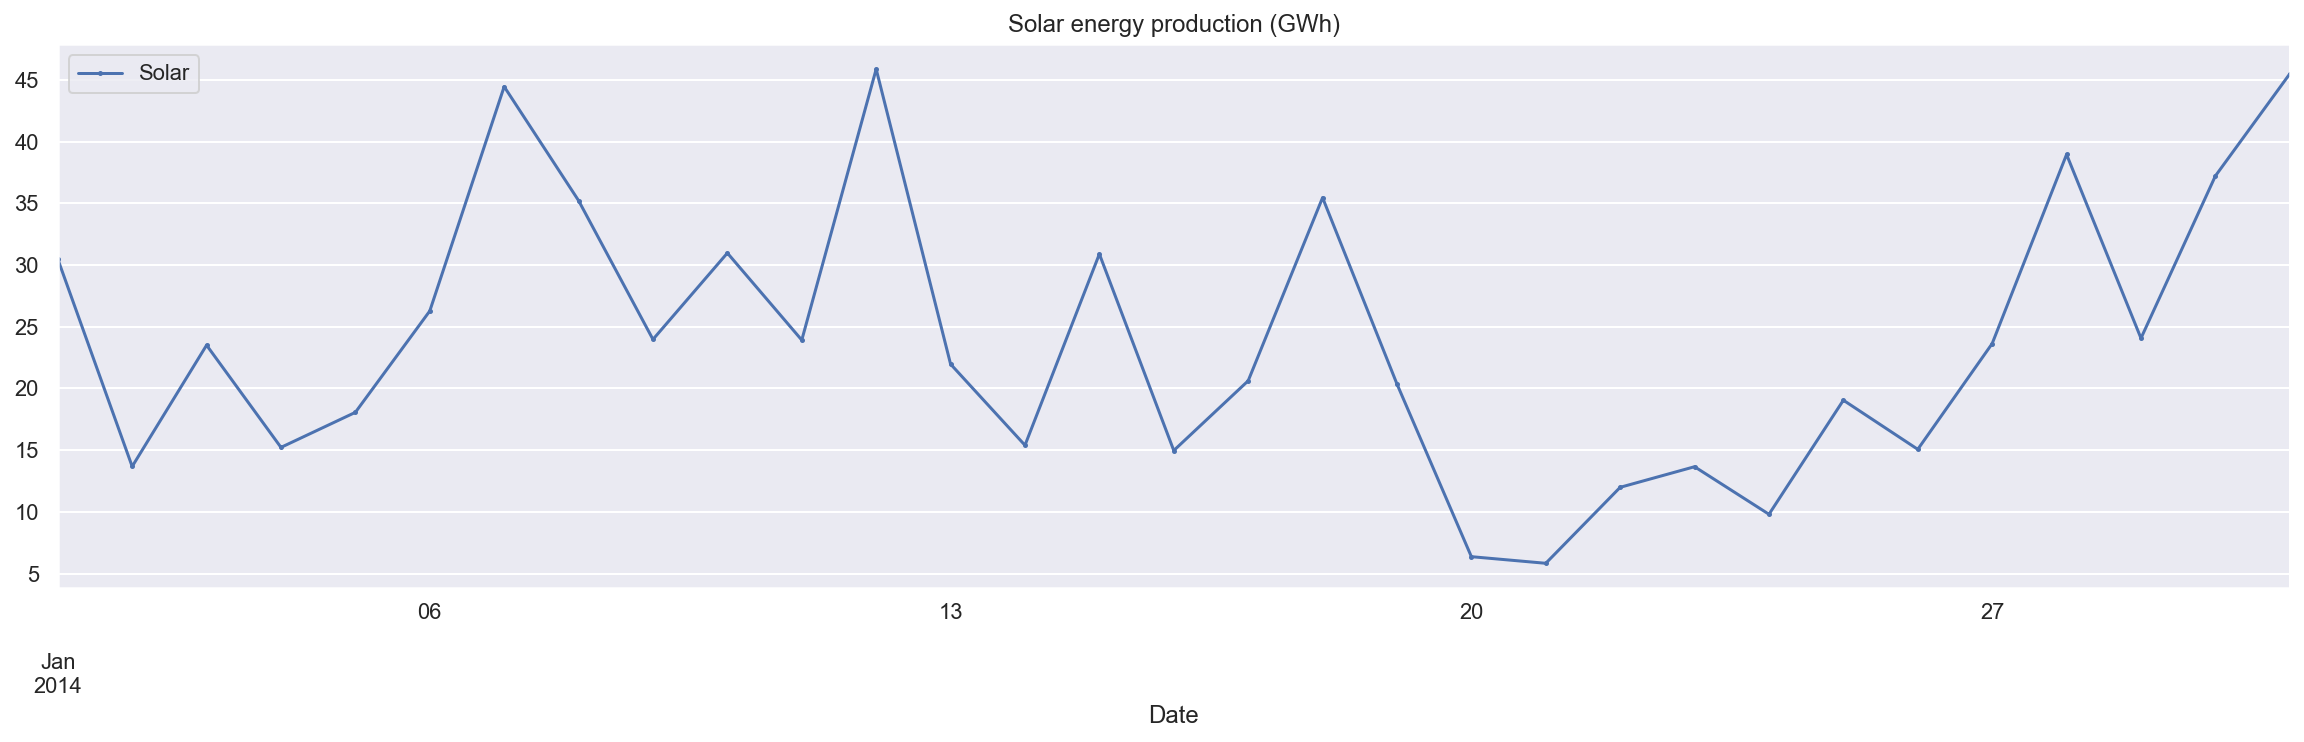

In [29]:
df_solar.loc['2014-01'].plot(figsize=(20, 5),
                         title='Solar energy production (GWh)',
                         marker='.',
                         markersize=3,
                         linestyle='-');

#### Multiple plots

Let's try to simultaneously visualise solar and wind energy production.

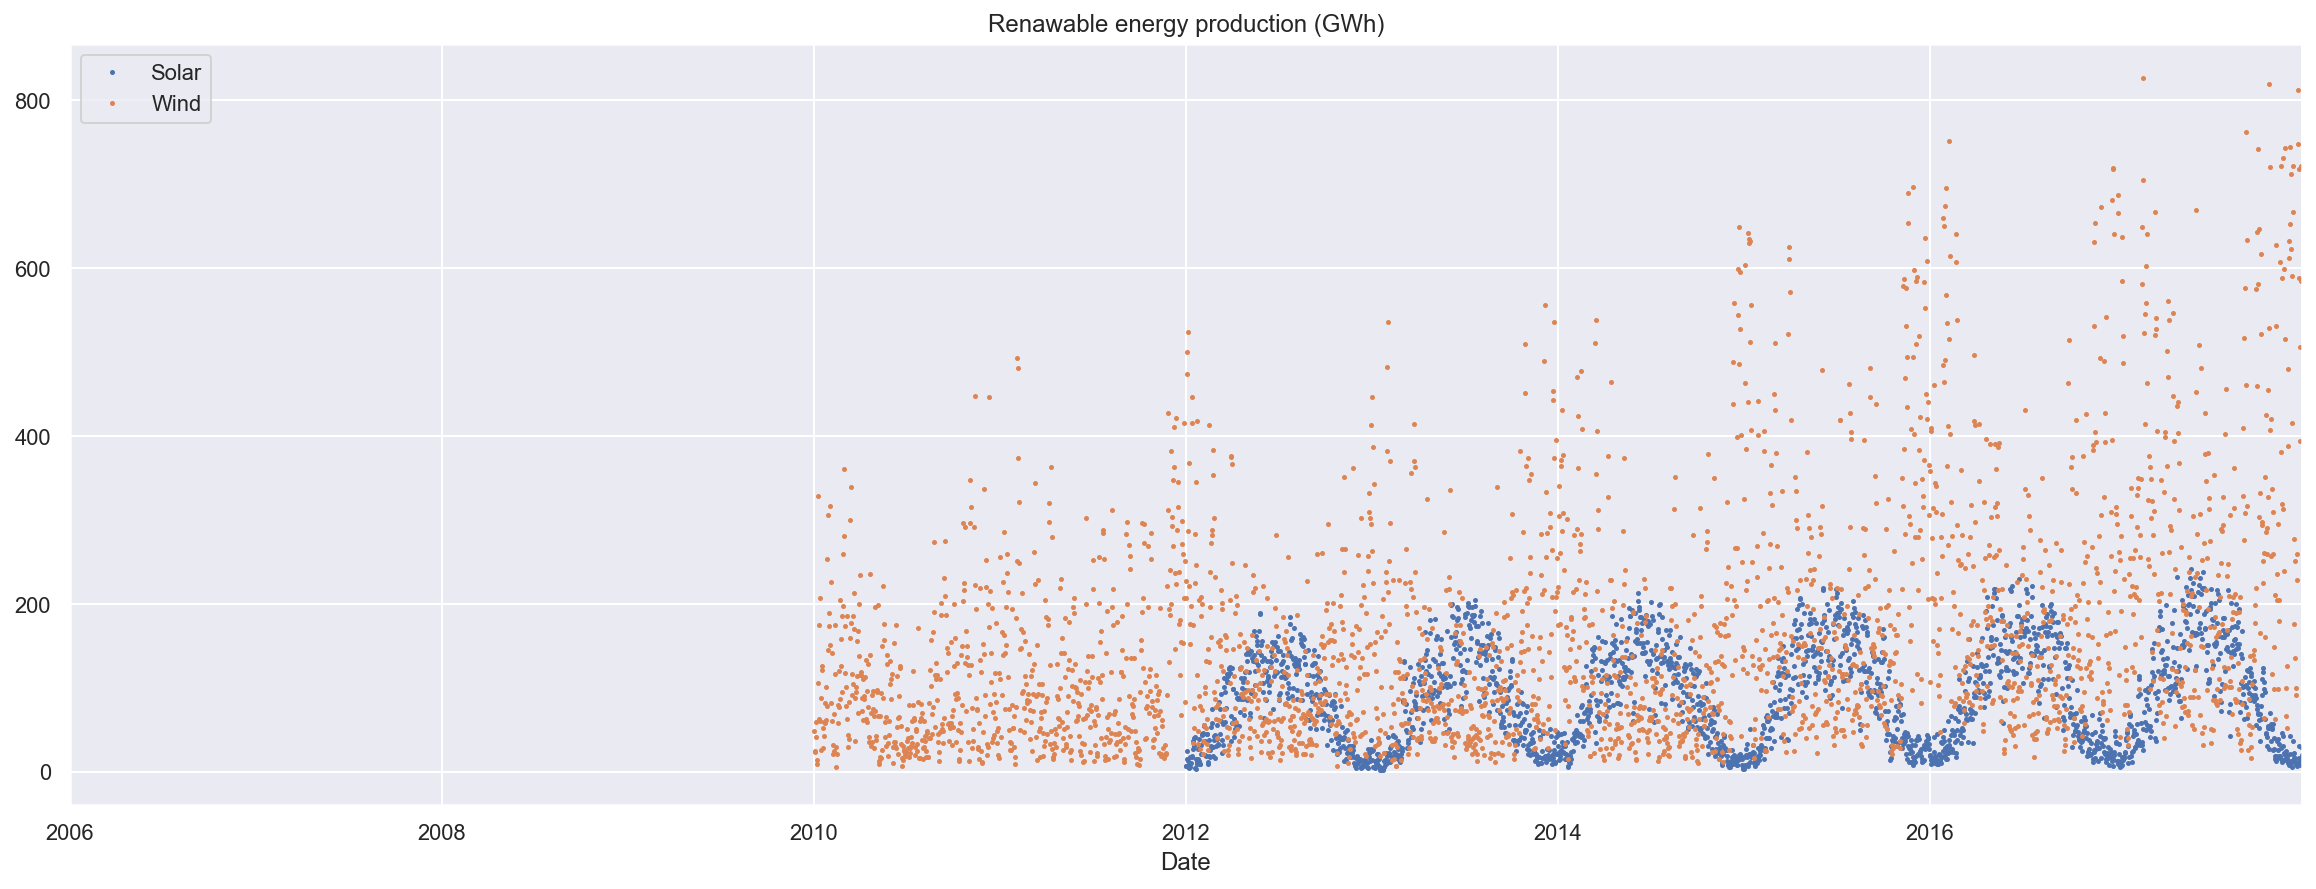

In [32]:
df_renewable = df[['Solar', 'Wind']]

df_renewable.plot(figsize=(20, 7),
                  title='Renawable energy production (GWh)',
                  marker='.',
                  markersize=3,
                  linestyle='');

The `subplots` argument allows us to create a plot for each column of the dataframe.

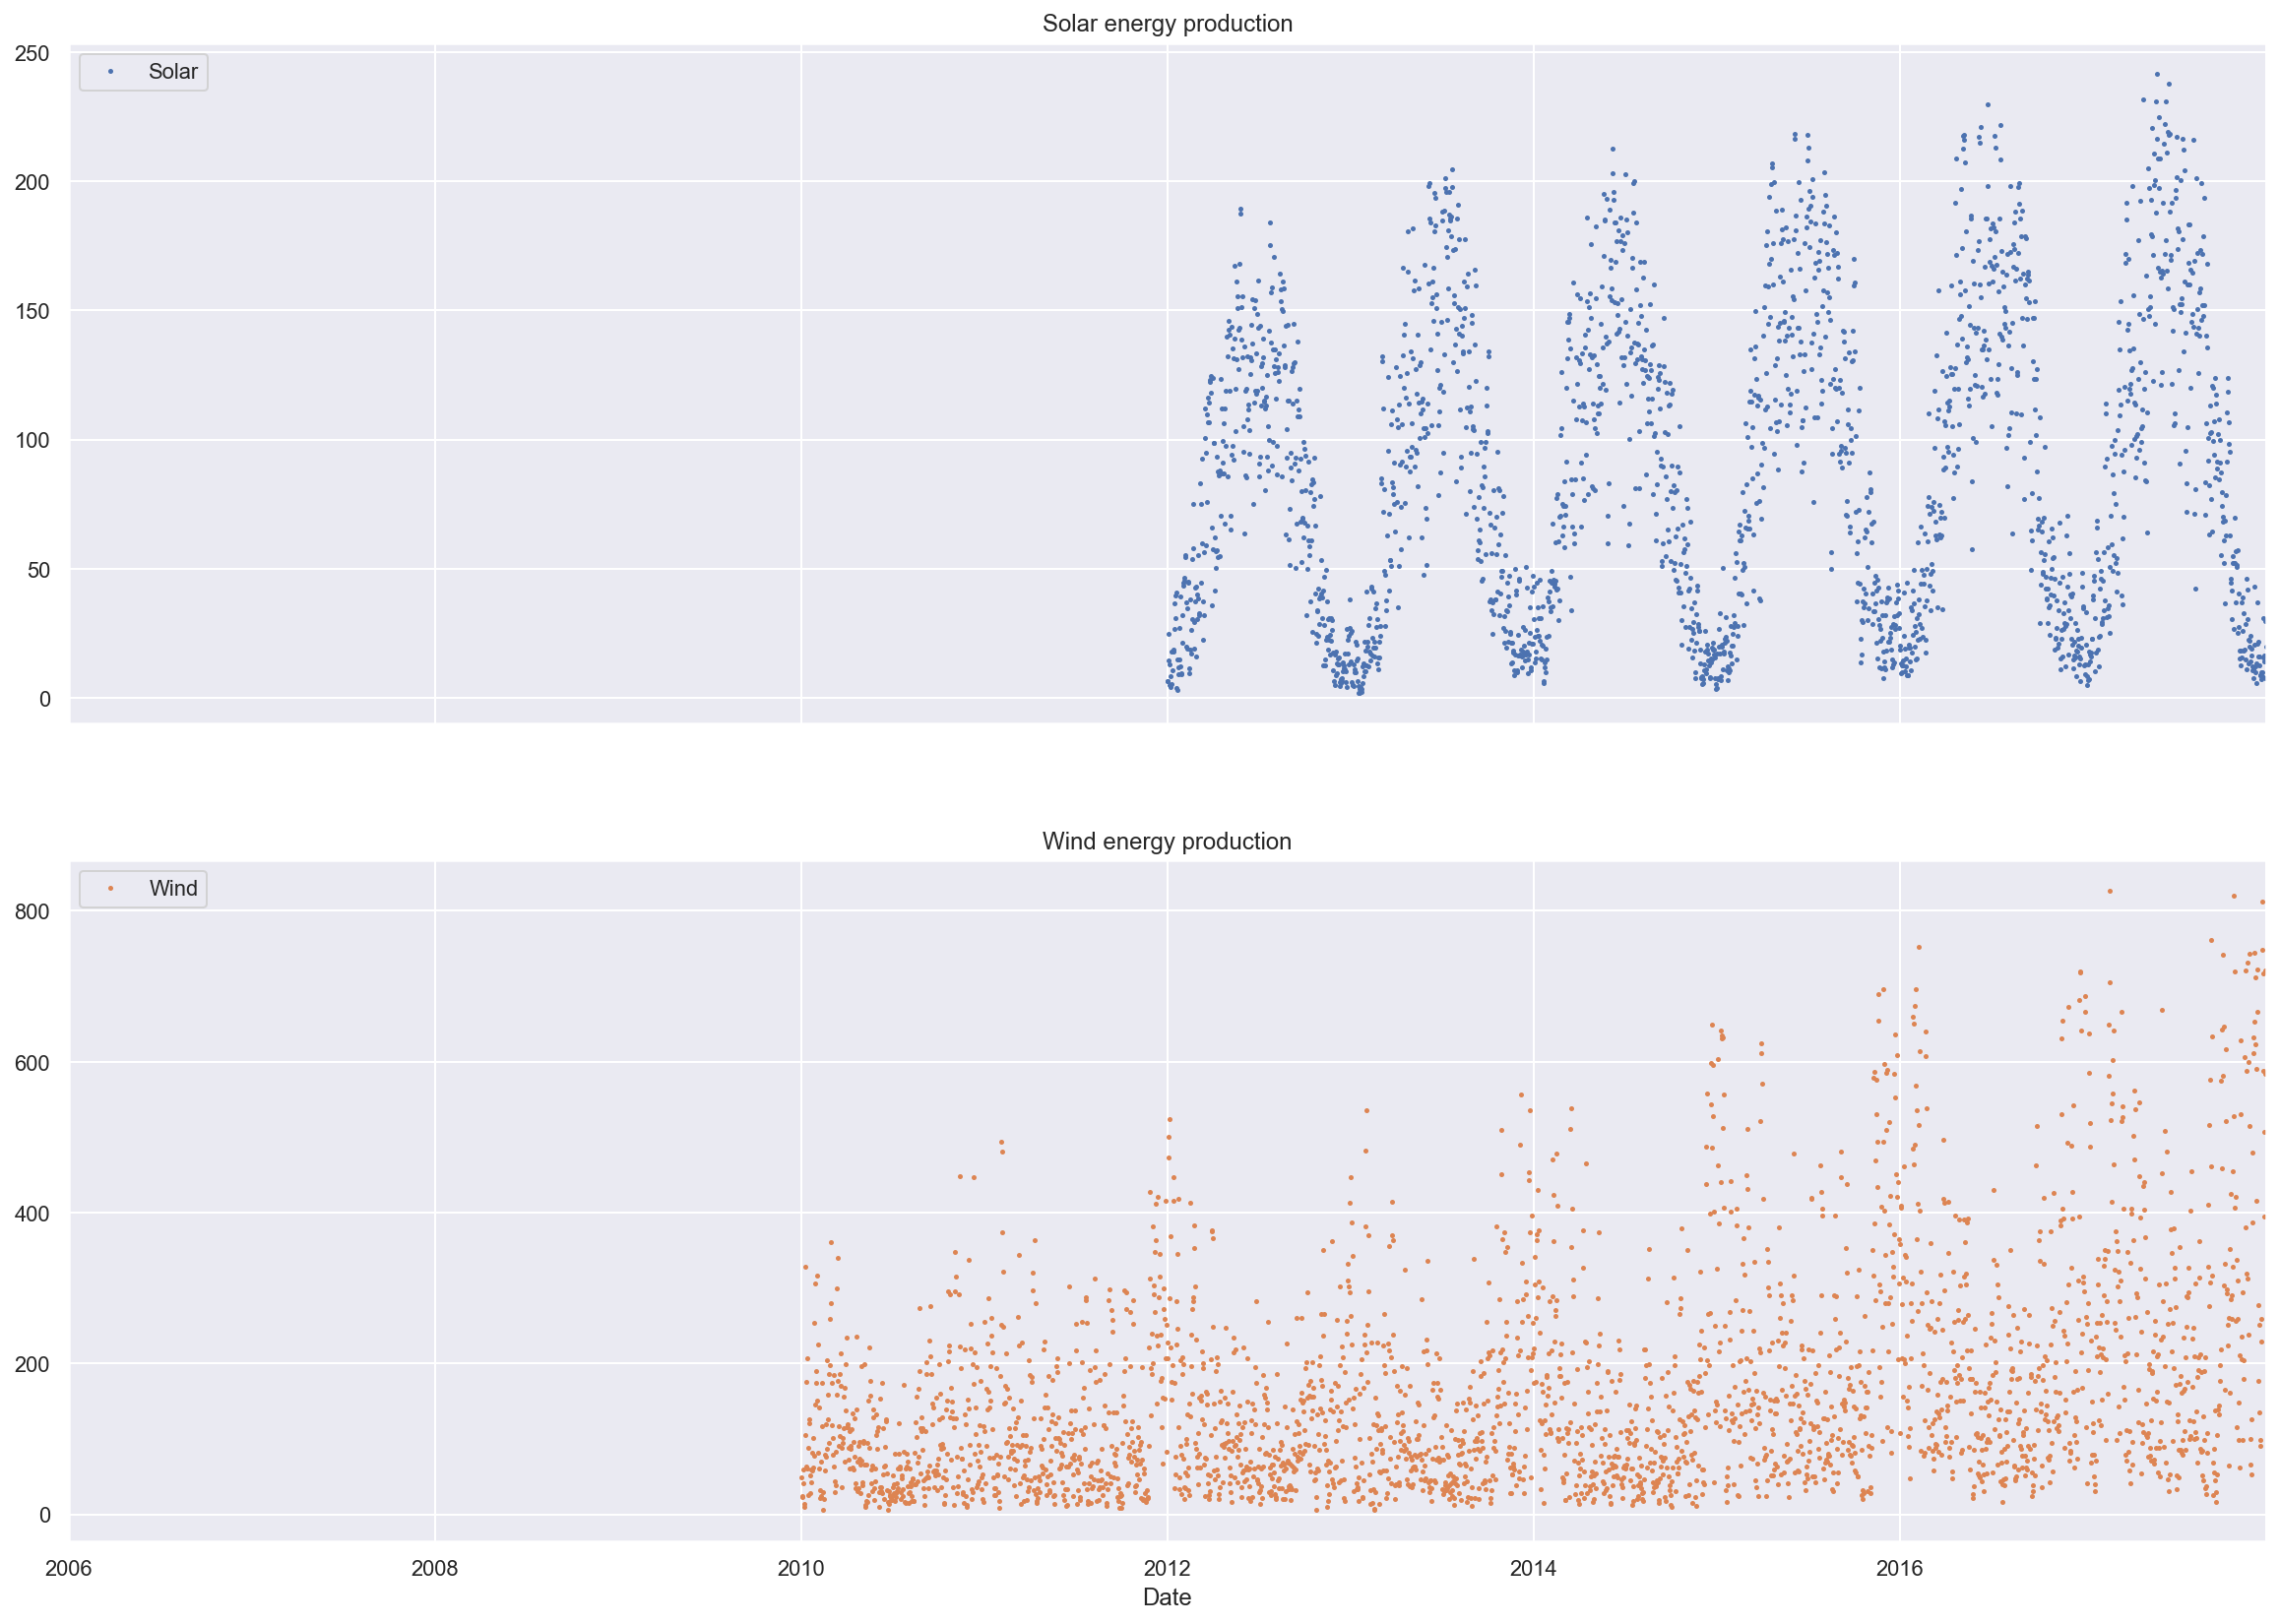

In [34]:
subplots = df_renewable.plot(figsize=(20, 14),
                             marker='.',
                             markersize=3,
                             linestyle='',
                             title=['Solar energy production', 'Wind energy production'],
                             subplots=True)

subplots;

Let's see how can we get the same using the proper matplotlib function `plt.plot`.

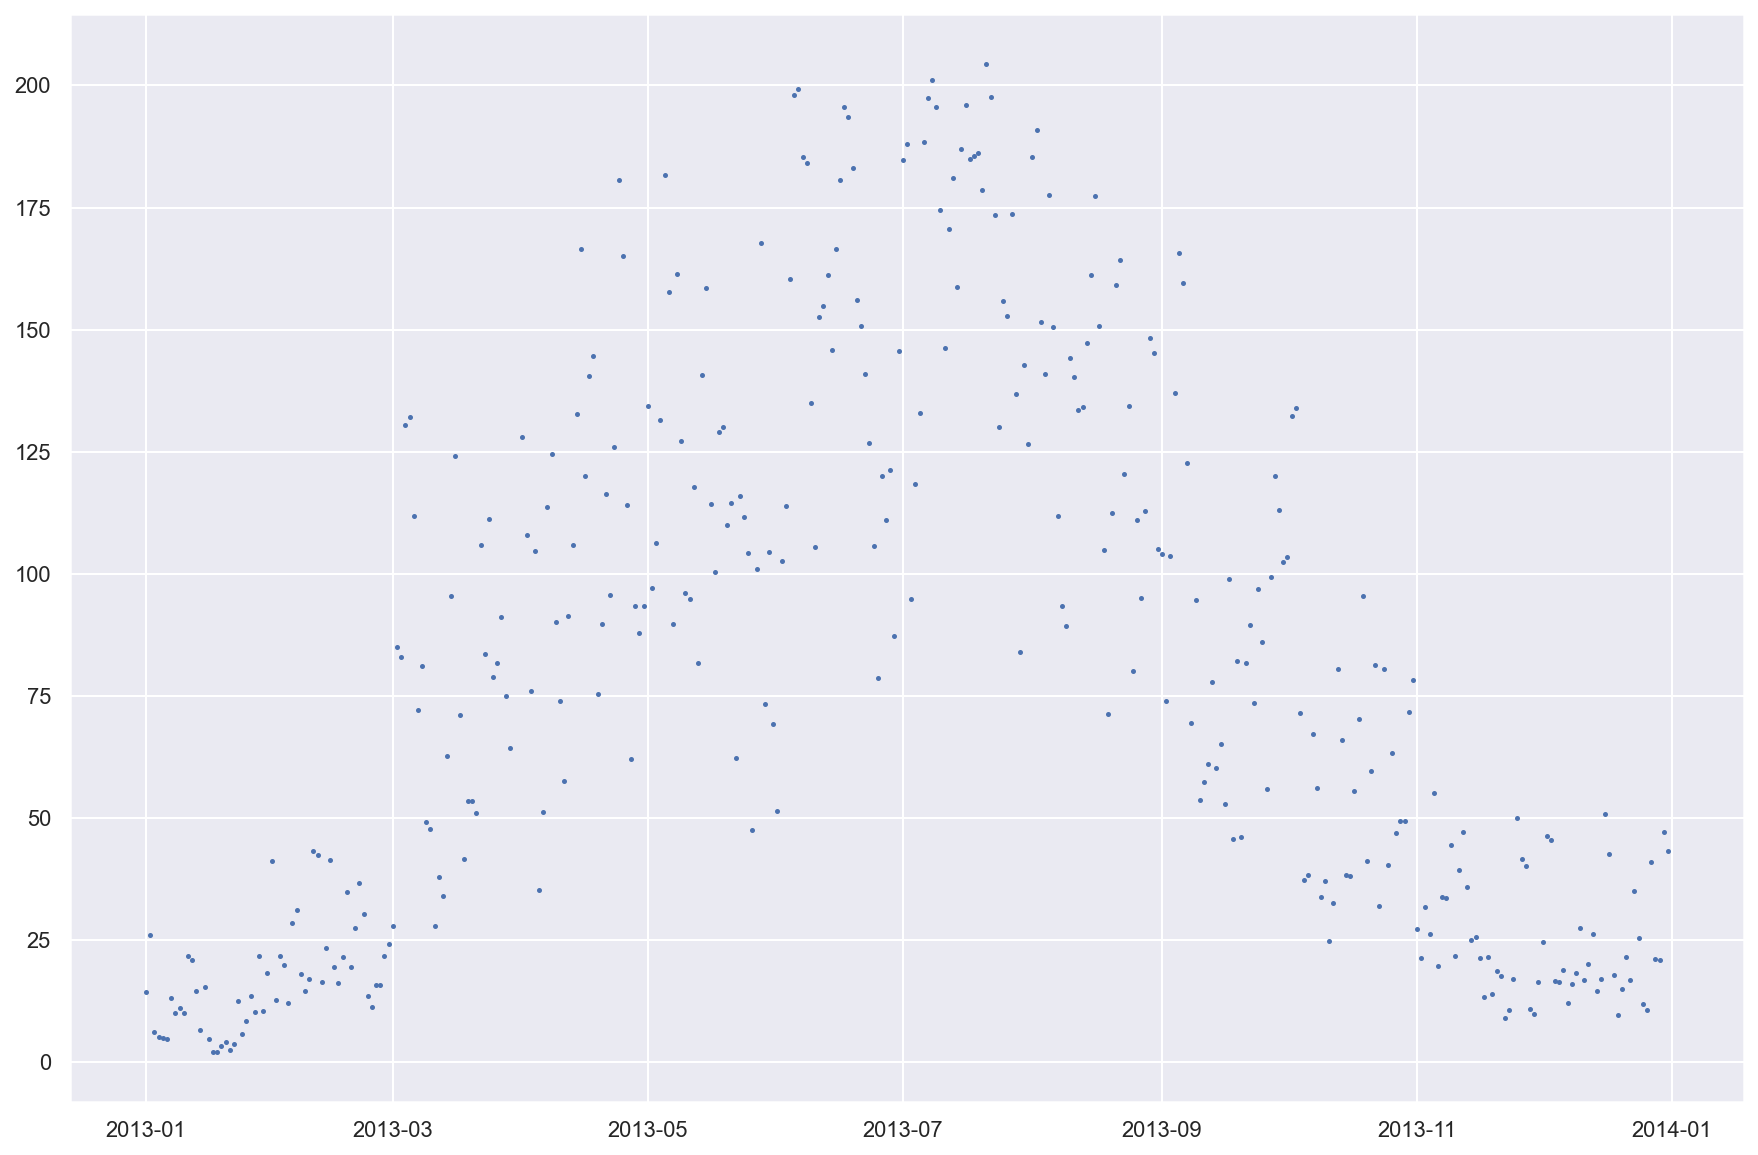

In [35]:
plt.plot(df['Solar']['2013'],
         linestyle='',
         marker='.',
         markersize=3);

Let's change its dimension.

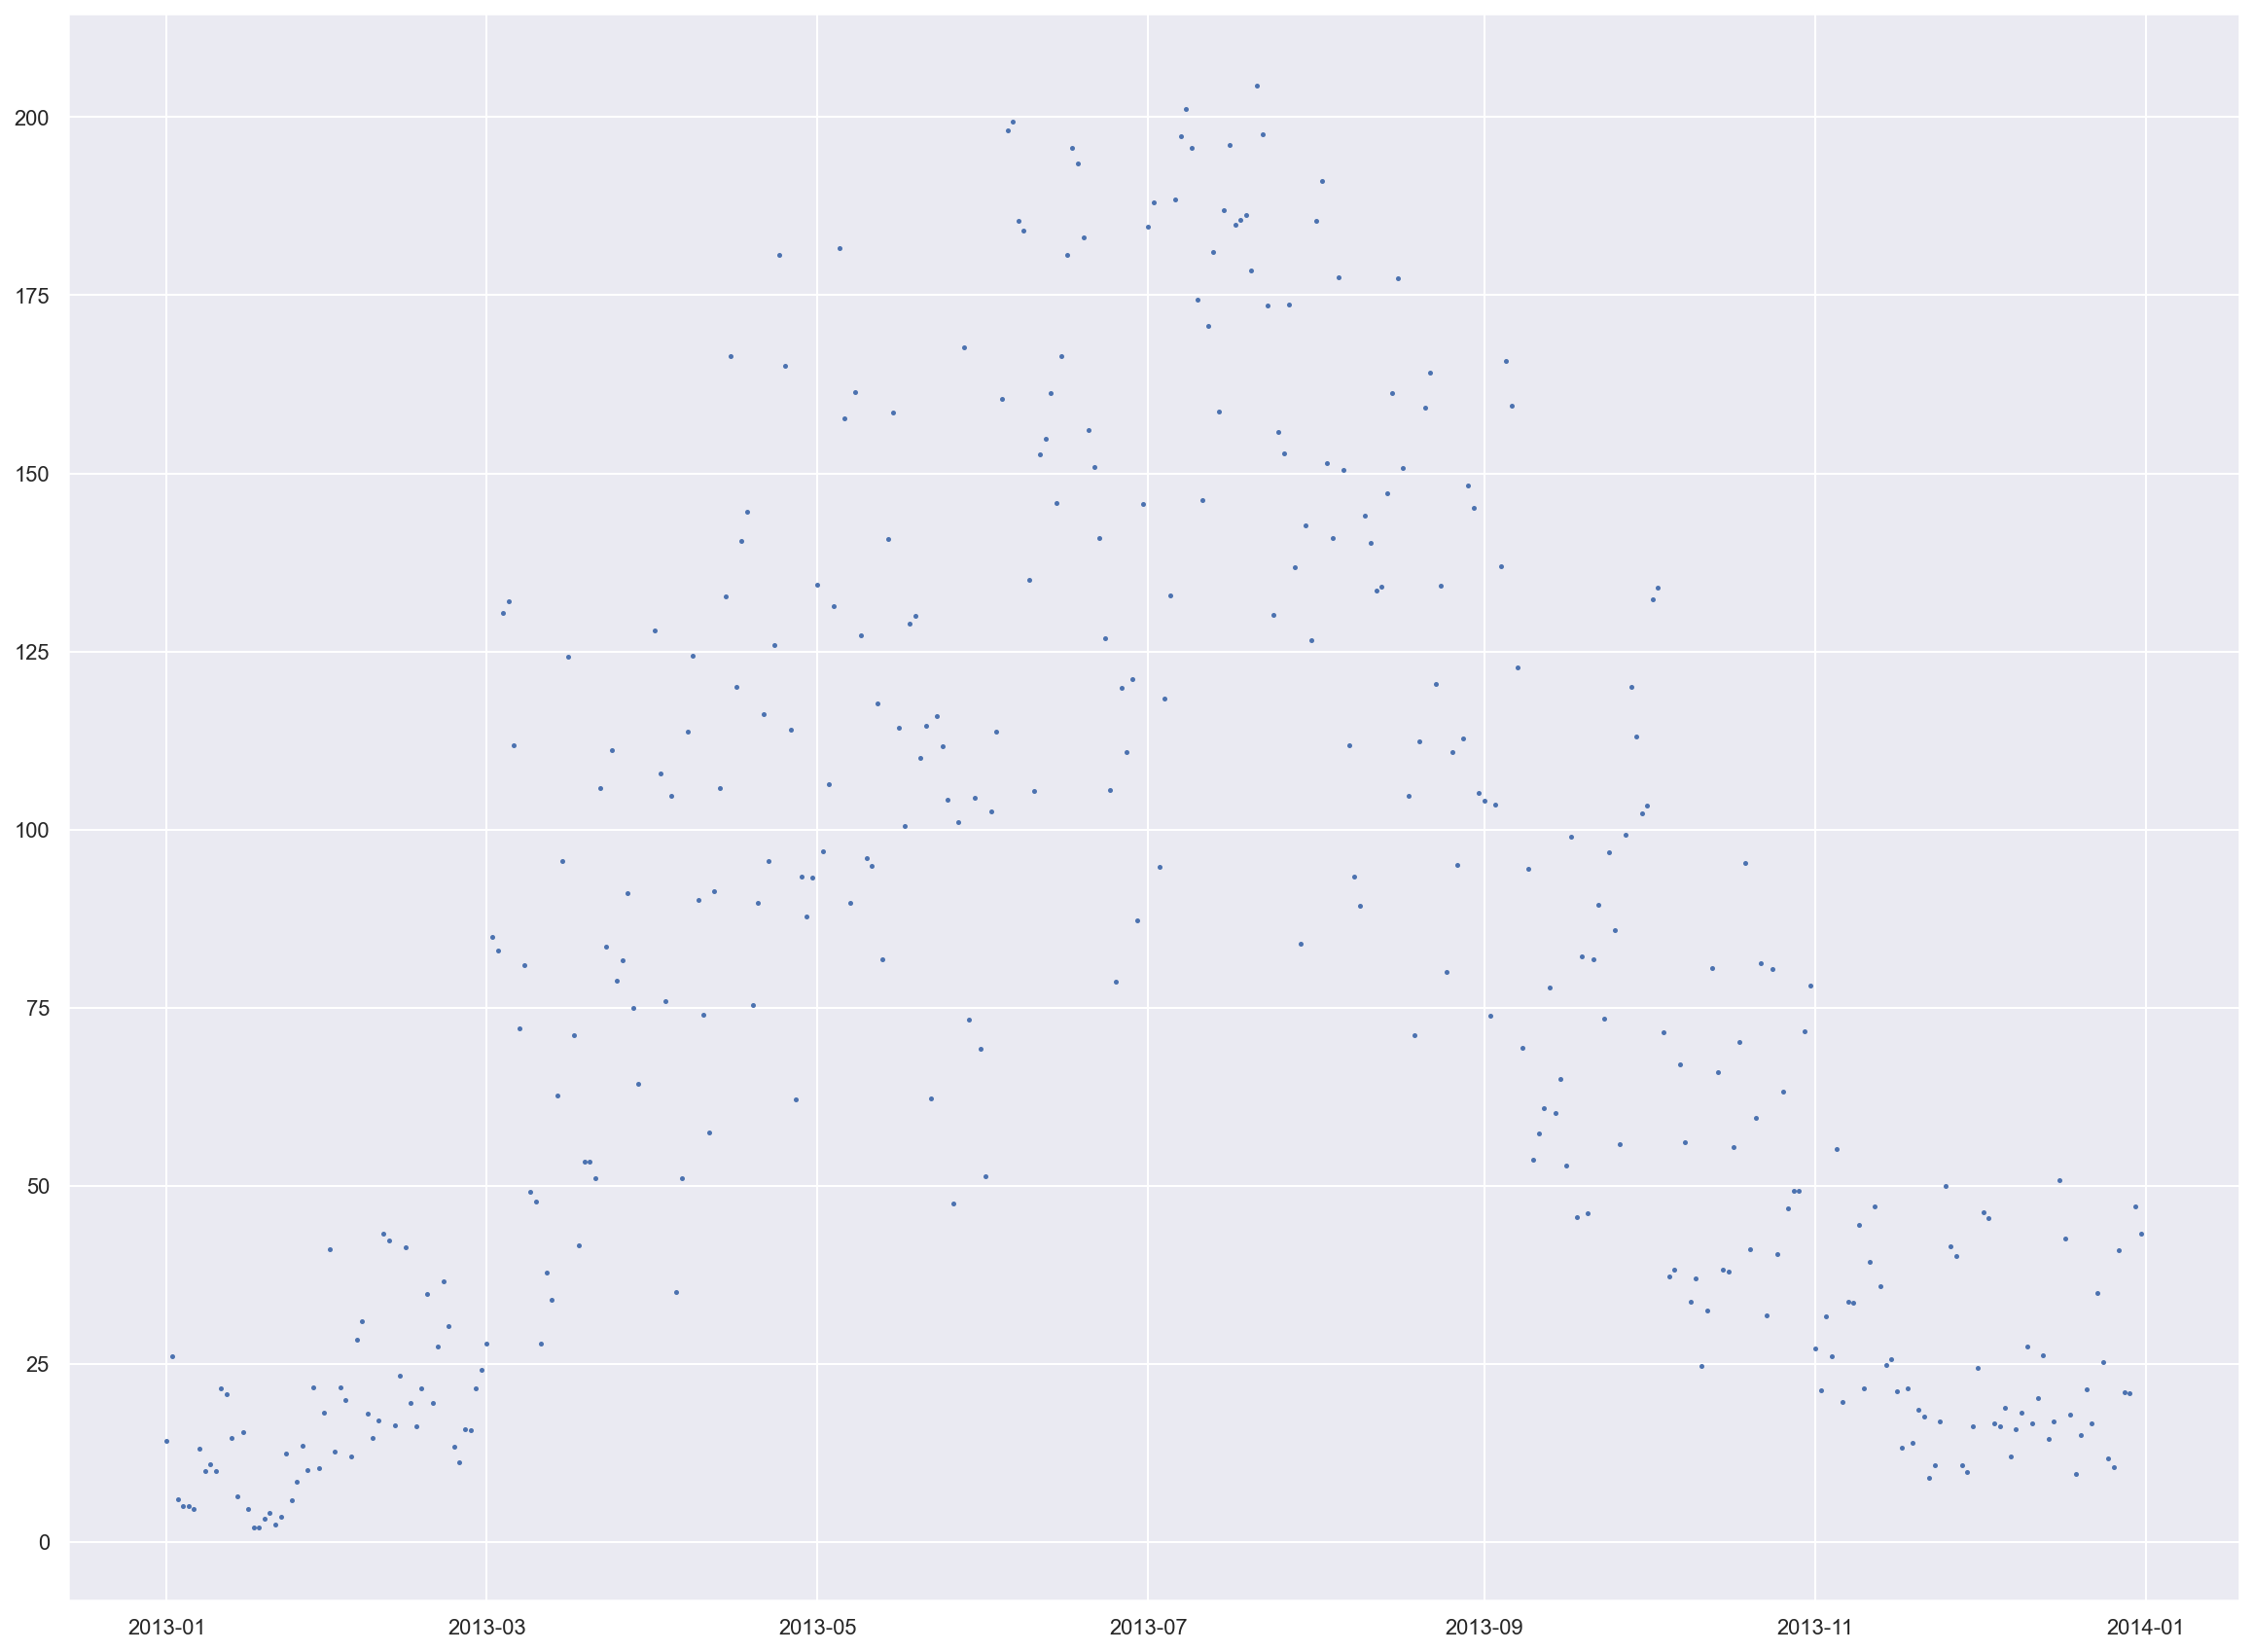

In [40]:
plt.figure(figsize=(20, 15))

plt.plot(df['Solar']['2013'],
         linestyle='',
         marker='.',
         markersize=3);

We want now another quantity to be added to the plot, _e.g._ wind production, though with a different graphical style.

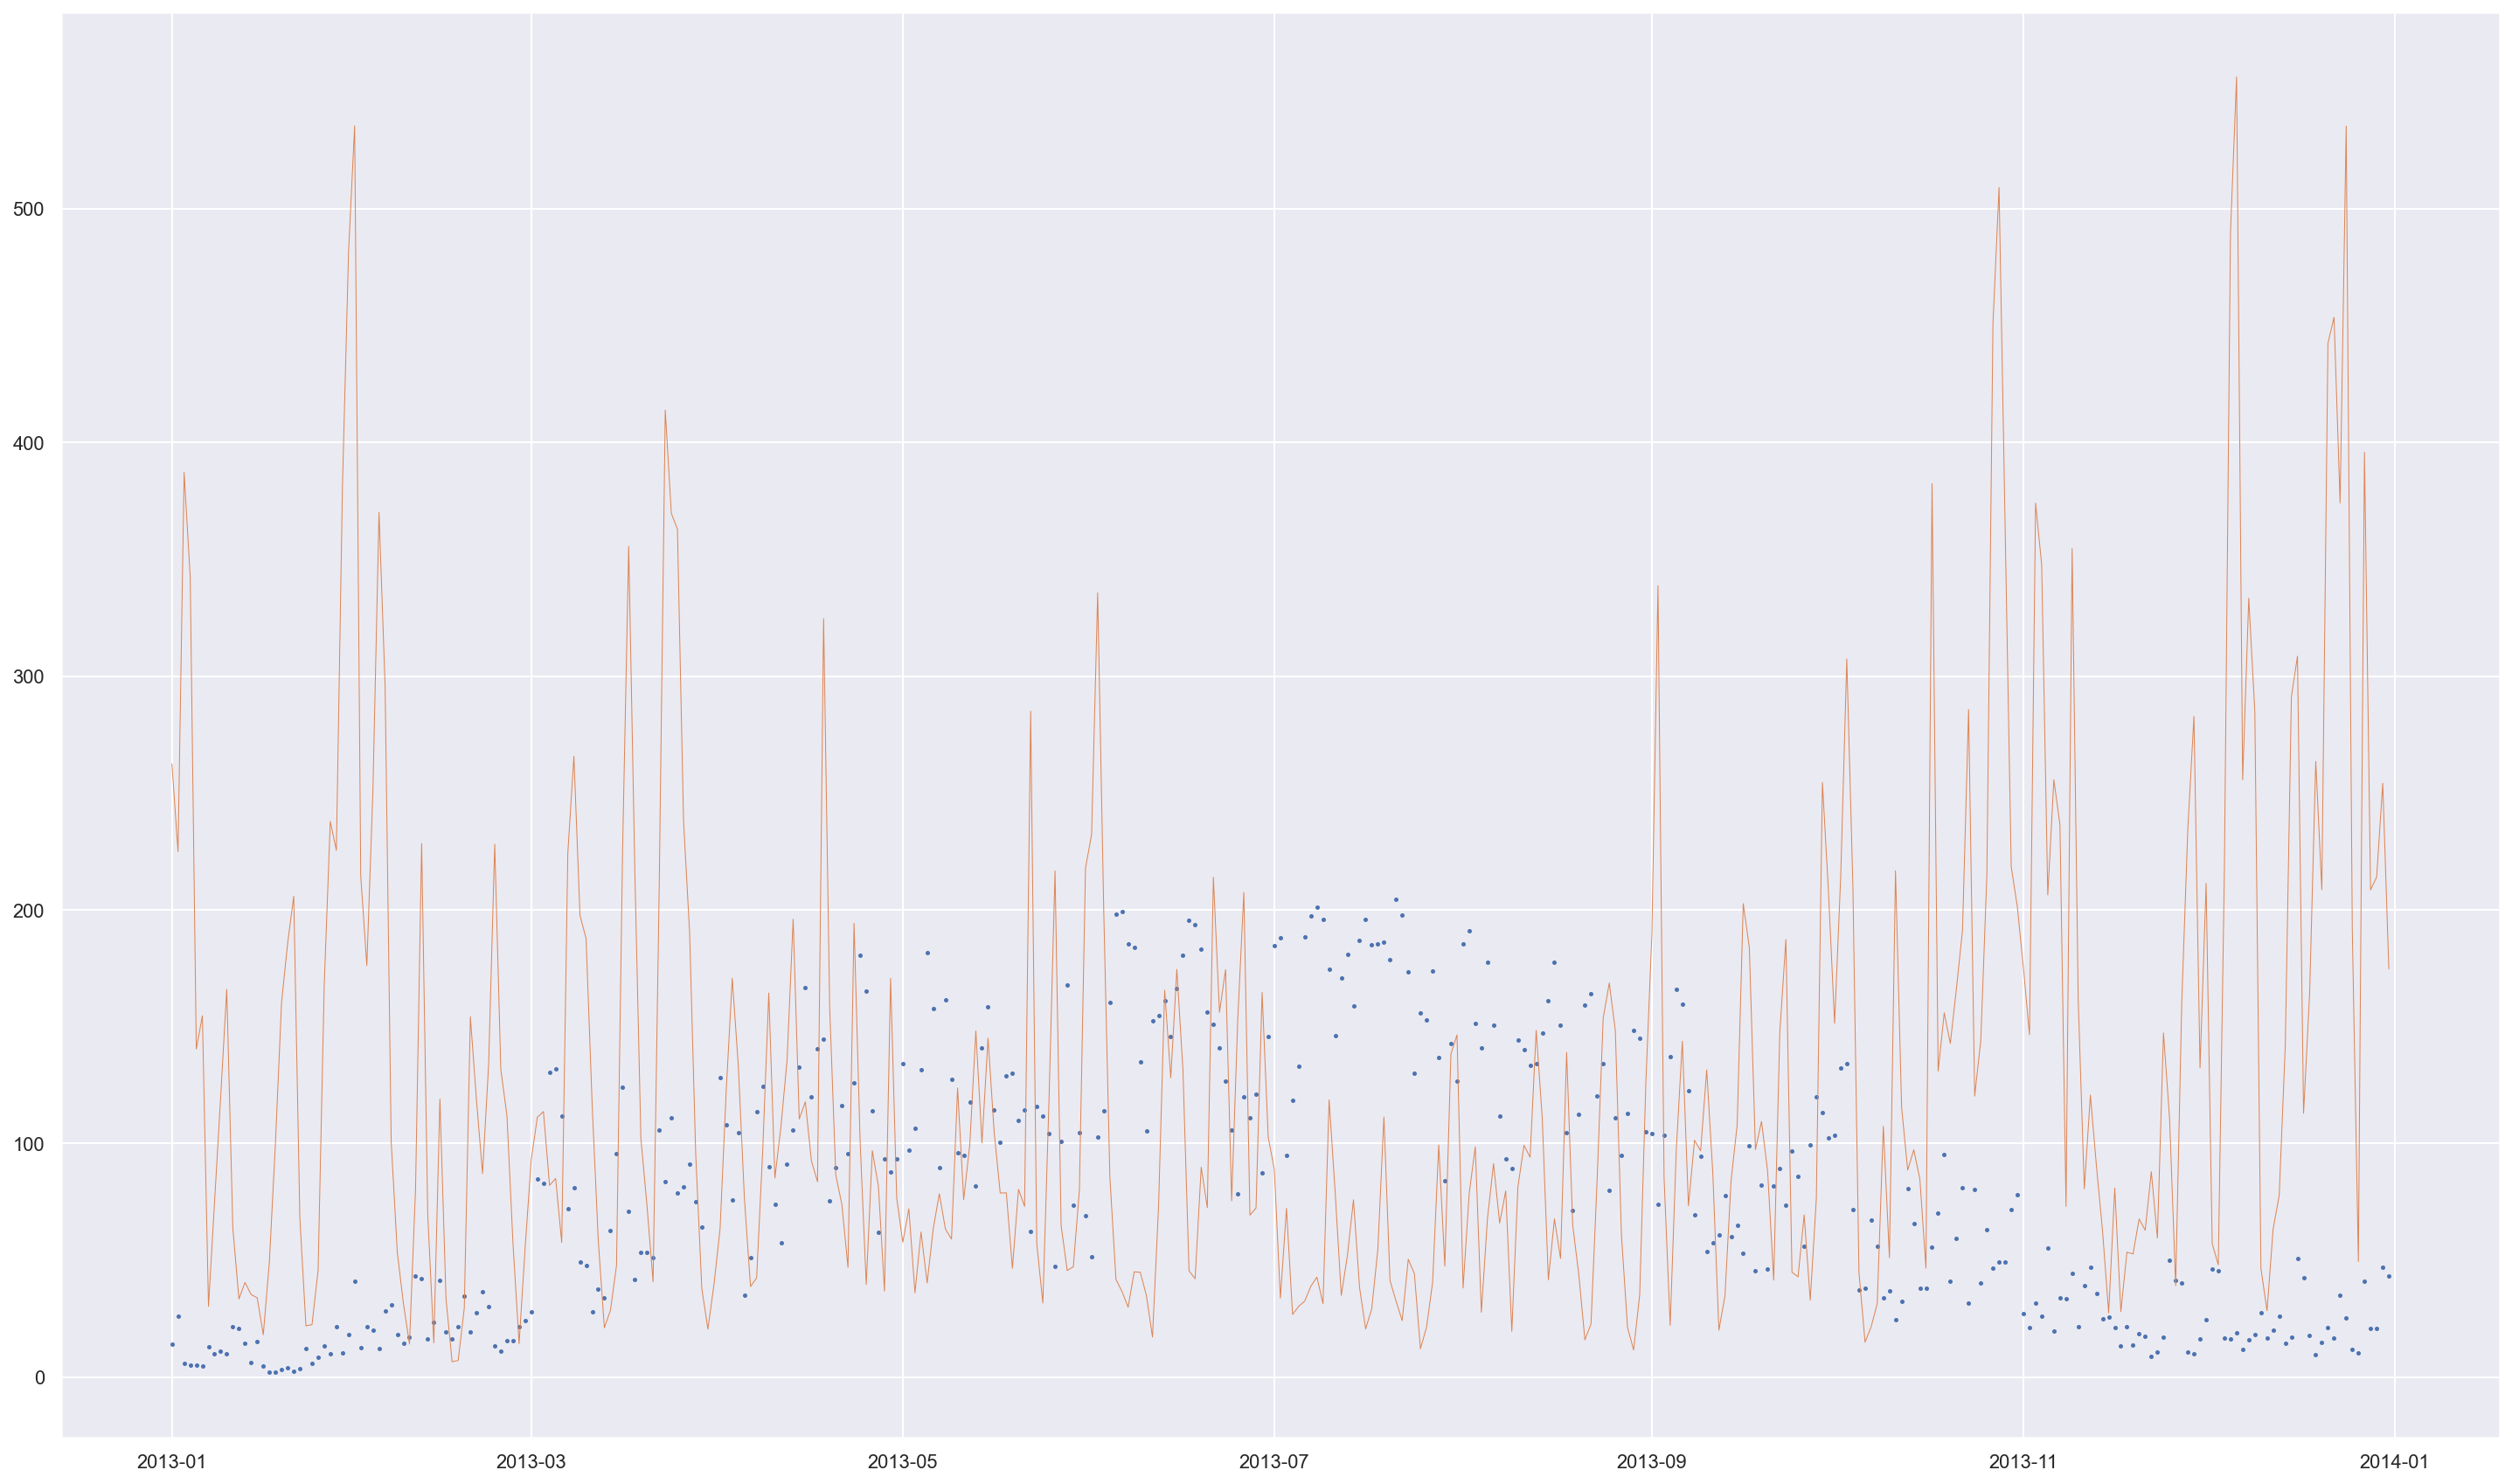

In [42]:
plt.figure(figsize=(25, 15))

plt.plot(df['Solar']['2013'],
         linestyle='',
         marker='.',
         markersize=3)

plt.plot(df['Wind']['2013'],
         linestyle='-',
         linewidth=0.5);


To make our plot nicer, we would like to customise it further by adding a legend and a title.

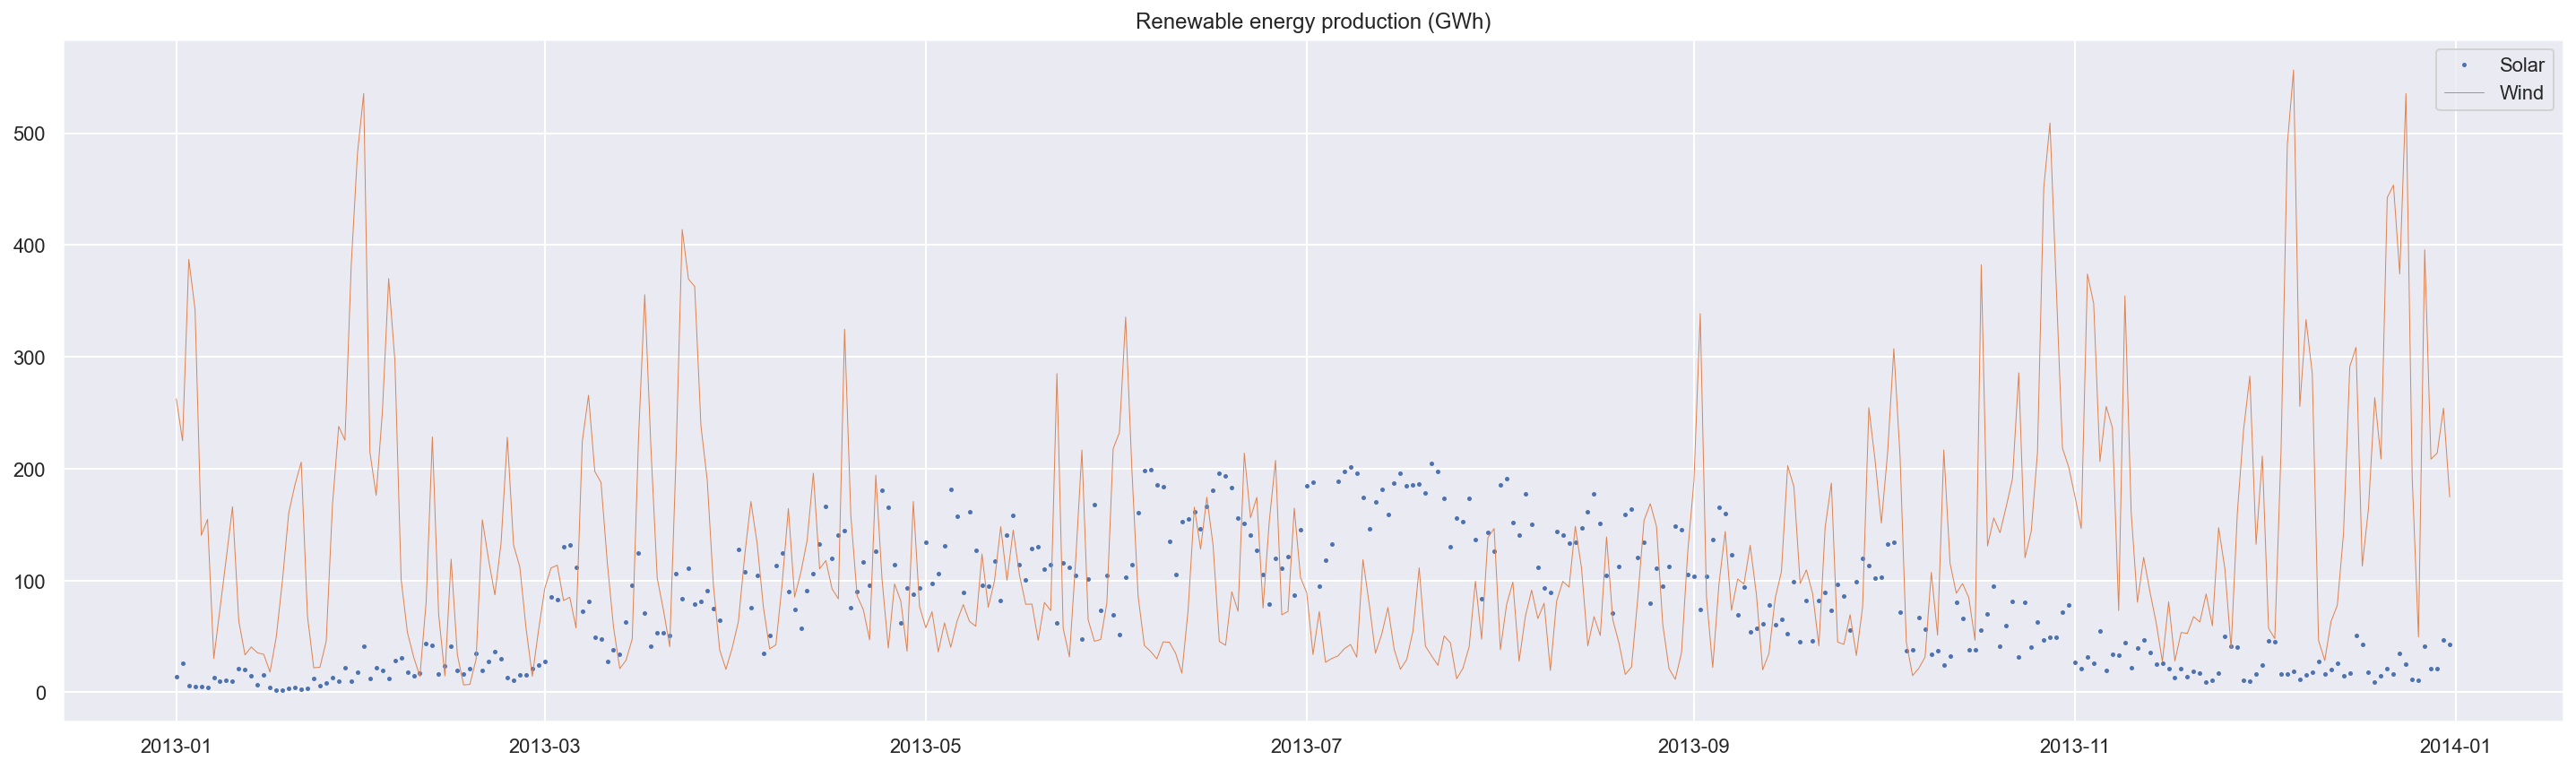

In [45]:
plt.figure(figsize=(25, 7))

plt.plot(df['Solar']['2013'],
         linestyle='',
         marker='.',
         markersize=3,
         label='Solar')

plt.plot(df['Wind']['2013'],
         linestyle='-',
         linewidth=0.5,
         label='Wind')

plt.title('Renewable energy production (GWh)')
plt.legend();

__Hint__: think of each cell as an independent graphical environment.

It might take some time to become familiar with Matplotlib. However,
* it is a really versatile tool.
* it is widely used, hence the Web is full with examples.

**Recap**: we have seen how to plot the content of a Dataframe with Pandas. We used Matplotlib to create sequential plots, wherein each subplot has specific graphical properties.

---
## Seasonality

The tendency of a variable to periodically reapeat its behaviour is called _seasonality_.

> Can you detect seasonality in the previous plots?

<details>
    <summary><b>Click here for the answer</b></summary> 
    (Yearly) seasonality is straightforward with solar energy: every year we observe the same behaviour, due to the availability of sunlight.
    <br>
    <br>
    Seasonality is not necessarily meterological: think of sales during Christmas holidays.
</details>
<br>

Our next goal is to represent the seasonality of the whole series.

## Exercise 2

1. Use the tools we have seen so far to plot the consumption of electric energy.

2. Use the tools we have seen so far to plot the consumption of electric energy from November 2013 to June 2015.

3. What kinds of seasonality can we observe on this variable? How can they be interpreted?

---

### groupby

A very useful tool in Pandas is `groupby`. It allows to group records based on one ore more properties and extract statistics from each group. We need three ingredients:

1. those variables based on which we build the groups
2. those variables of which we want to know the behaviour within each group
3. the statistics we extract from the latter, group by group.

Let's use `groupby` to analise the yearly seasonality of electric energy production.

In [46]:
df['Month'] = df.index.month_name()

df.head()

,Consumption,Wind,Solar,Month
Date,,,,
2006-01-01,1069.184,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,January


We want to see the mean production values in each month, no matter which year.

In [47]:
df.groupby('Month').mean()

,Consumption,Wind,Solar
Month,,,
April,1298.457644,148.644725,119.734933
August,1249.991327,109.350778,138.778575
December,1374.364568,277.566526,20.068538
February,1452.463841,206.942903,43.846735
January,1433.781435,207.716480,19.569602
July,1266.701788,112.376440,150.746720
June,1263.169508,114.812058,152.569494
March,1380.694497,174.218785,88.038121
May,1261.905065,129.161601,139.967312


Note that since "Month" is a string valued column, the `groupby` sorted in alphabetical order. We do not want this behaviour, so we switch the argument `sort` from the default `True` to `False`.

In [48]:
df.groupby('Month', sort=False).mean()

,Consumption,Wind,Solar
Month,,,
January,1433.781435,207.716480,19.569602
February,1452.463841,206.942903,43.846735
March,1380.694497,174.218785,88.038121
April,1298.457644,148.644725,119.734933
May,1261.905065,129.161601,139.967312
June,1263.169508,114.812058,152.569494
July,1266.701788,112.376440,150.746720
August,1249.991327,109.350778,138.778575
September,1314.348716,127.731125,103.247256


This is an ordinary dataframe, so the usual filter operations are allowed.

In [49]:
df.groupby('Month', sort=False)['Solar'].mean() # This gives a Series

Month
January       19.569602
February      43.846735
March         88.038121
April        119.734933
May          139.967312
June         152.569494
July         150.746720
August       138.778575
September    103.247256
October       61.328371
November      30.869122
December      20.068538
Name: Solar, dtype: float64

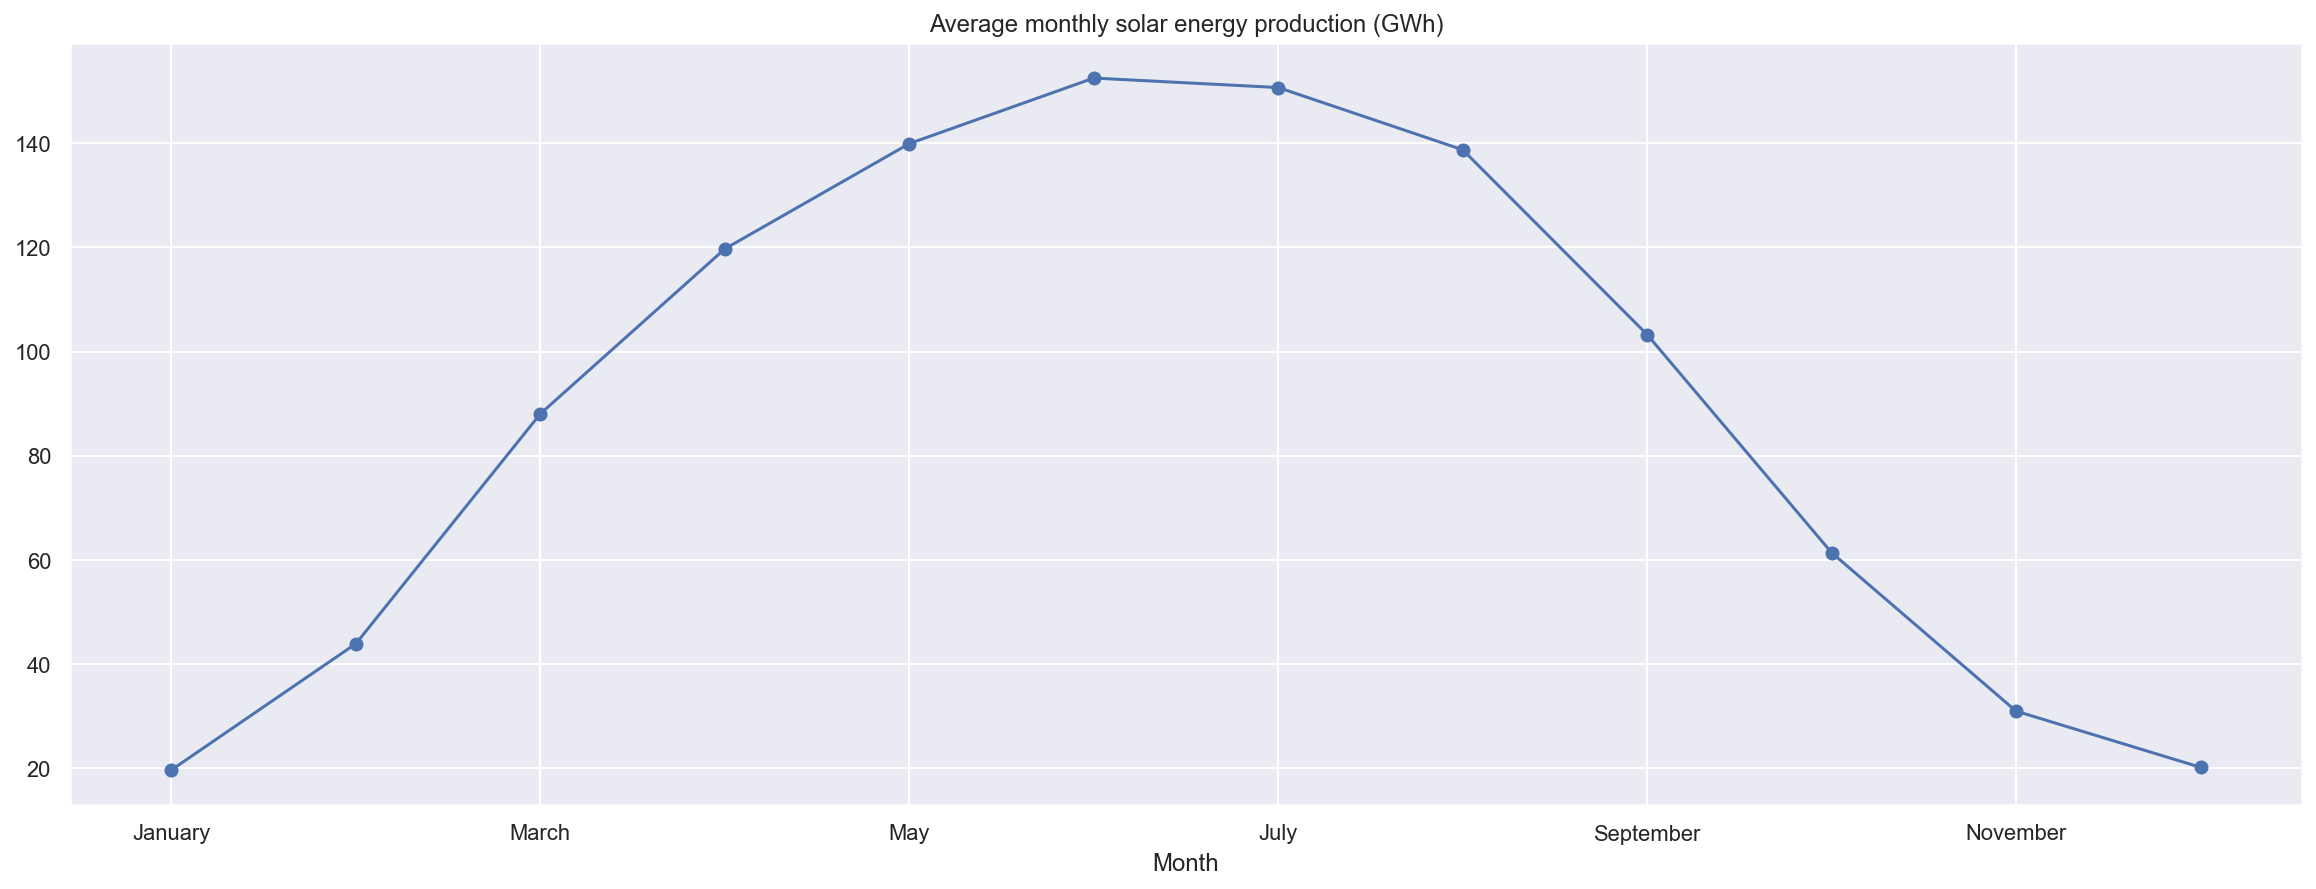

In [50]:
df.groupby('Month', sort=False)['Solar'].mean().plot(figsize=(20, 7),
                                                     marker='o',
                                                     title='Average monthly solar energy production (GWh)');

### Boxplots
A boxplot has an informative content similar to that of groupby, though a bit richer.

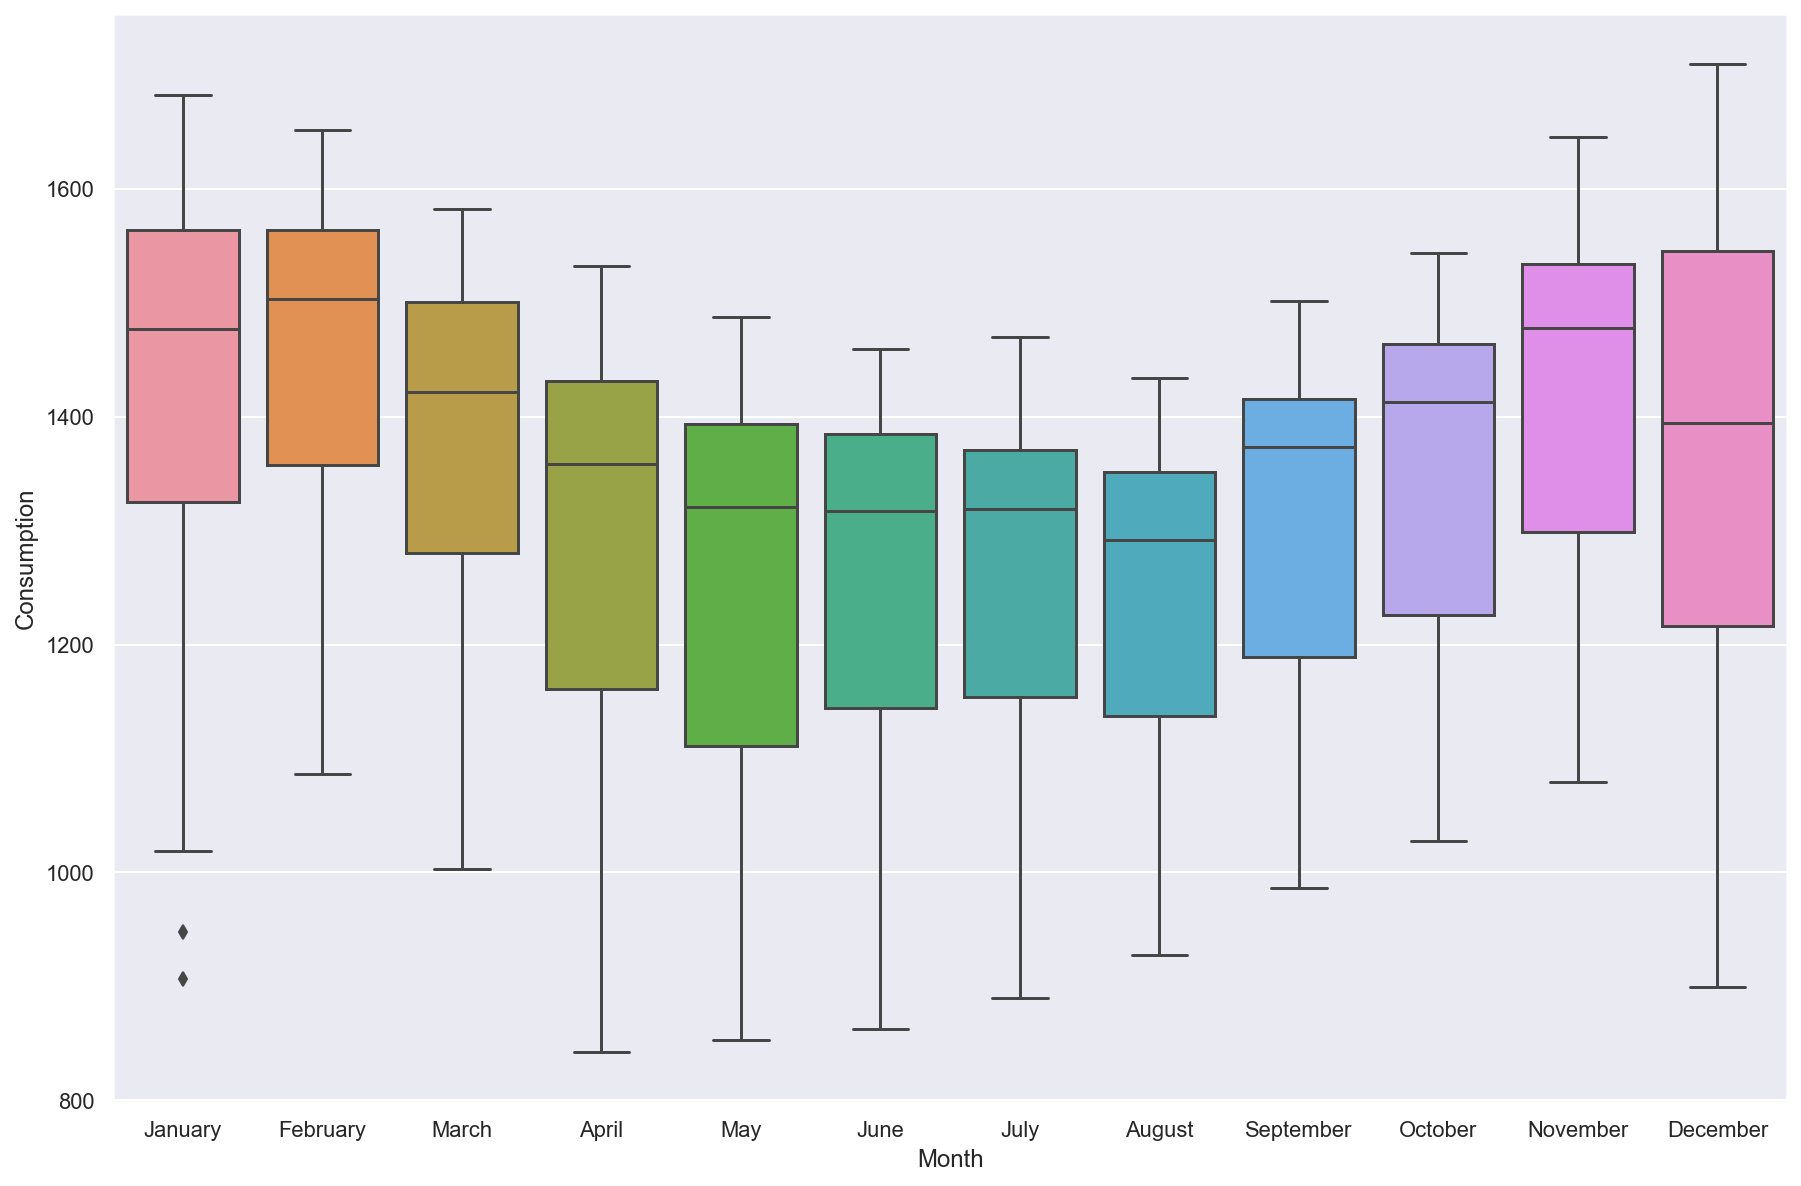

In [51]:
sns.boxplot(x='Month',
            y='Consumption',
            data=df);

There we go. Finally, let's learn [how to read a boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51).

## Exercise 3

Analise the weekly seasonality of electric energy consumption using the `groupby` (Pandas) and `boxplot` (Seaborn) functions.

### Going deeper

Here are some random hints to delve deeper into time series:

> there are plenty of time dependent data out there: look for your time series and prepare it for analysis.

Think (meaning brain, pen and paper) about how time series and classic supervised learning are related to each other (hyperparameter validation? time series as rows instead of columns? turning a time series into a supervised learning task?)

boxplot is a nice tool, got it. Is it always that? First, think; then look here and play with this and this

explore Matplotlib properties as well as Seaborn functions (and their many arguments).